In [1]:
from google.colab import files
uploaded = files.upload()

Saving trots_2013-2022.parquet to trots_2013-2022.parquet


In [180]:
import pandas as pd

pd.set_option('display.max_columns', None)
original_df = pd.read_parquet('trots_2013-2022.parquet', engine='pyarrow')
original_df.head(5)

,AgeRestriction,Barrier,BeatenMargin,ClassRestriction,CourseIndicator,DamID,Disqualified,Distance,FinishPosition,FoalingCountry,FoalingDate,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,HorseID,JockeyID,PIRPosition,PriceSP,Prizemoney,RaceGroup,RaceID,RaceOverallTime,RacePrizemoney,RaceStartTime,RacingSubType,Saddlecloth,SexRestriction,SireID,StartType,StartingLine,Surface,TrackID,TrainerID,NoFrontCover,PositionInRunning,WideOffRail,WeightCarried,WetnessScale
0,6yo,5,1.55,NW$101 CD,,1491946,False,2150.0,2,FR,2009-04-13,0,F,G,4,0.0,,0,6,1514407,23568,0,3.50,11500.0,,1596364,168.89,46000.0,2015-04-18 14:01:00,T,5,M,1474781,M,1,S,951,38190,-9,-9,-9,0.0,3
1,6yo,6,3.55,NW$101 CD,,1509392,False,2150.0,4,FR,2009-05-24,0,F,G,4,0.0,,0,6,1509393,25025,0,4.75,3680.0,,1596364,168.89,46000.0,2015-04-18 14:01:00,T,6,M,1474692,M,1,S,951,38432,-9,-9,-9,0.0,3
2,6yo,7,5.55,NW$101 CD,,1507967,False,2150.0,6,FR,2009-04-07,0,F,G,4,0.0,,0,6,1507968,26525,0,6.50,920.0,,1596364,168.89,46000.0,2015-04-18 14:01:00,T,7,M,1507583,M,1,S,951,37826,-9,-9,-9,0.0,3
3,6yo,8,999.00,NW$101 CD,,1508536,False,2150.0,BS,FR,2009-05-07,0,F,G,4,0.0,,0,6,1508537,23004,0,28.00,0.0,,1596364,168.89,46000.0,2015-04-18 14:01:00,T,8,M,1499267,M,1,S,951,38293,-9,-9,-9,0.0,3
4,6yo,9,999.00,NW$101 CD,,1514055,False,2150.0,BS,FR,2009-04-26,0,F,G,4,0.0,,0,6,1514056,23249,0,32.00,0.0,,1596364,168.89,46000.0,2015-04-18 14:01:00,T,9,M,1475423,M,2,S,951,38945,-9,-9,-9,0.0,3


In [182]:
# first move time to the first col
df = original_df.copy()
df.RaceStartTime = pd.to_datetime(df.RaceStartTime)
moved_column = df.pop('RaceStartTime')
# Use the 'insert' method to insert the column at the beginning of the DataFrame
df.insert(0, 'RaceStartTime', moved_column)
df.head(30)

,RaceStartTime,AgeRestriction,Barrier,BeatenMargin,ClassRestriction,CourseIndicator,DamID,Disqualified,Distance,FinishPosition,FoalingCountry,FoalingDate,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,HorseID,JockeyID,PIRPosition,PriceSP,Prizemoney,RaceGroup,RaceID,RaceOverallTime,RacePrizemoney,RacingSubType,Saddlecloth,SexRestriction,SireID,StartType,StartingLine,Surface,TrackID,TrainerID,NoFrontCover,PositionInRunning,WideOffRail,WeightCarried,WetnessScale
0,2015-04-18 14:01:00,6yo,5,1.55,NW$101 CD,,1491946,False,2150.0,2,FR,2009-04-13,0,F,G,4,0.0,,0,6,1514407,23568,0,3.50,11500.0,,1596364,168.89,46000.0,T,5,M,1474781,M,1,S,951,38190,-9,-9,-9,0.0,3
1,2015-04-18 14:01:00,6yo,6,3.55,NW$101 CD,,1509392,False,2150.0,4,FR,2009-05-24,0,F,G,4,0.0,,0,6,1509393,25025,0,4.75,3680.0,,1596364,168.89,46000.0,T,6,M,1474692,M,1,S,951,38432,-9,-9,-9,0.0,3
2,2015-04-18 14:01:00,6yo,7,5.55,NW$101 CD,,1507967,False,2150.0,6,FR,2009-04-07,0,F,G,4,0.0,,0,6,1507968,26525,0,6.50,920.0,,1596364,168.89,46000.0,T,7,M,1507583,M,1,S,951,37826,-9,-9,-9,0.0,3
3,2015-04-18 14:01:00,6yo,8,999.00,NW$101 CD,,1508536,False,2150.0,BS,FR,2009-05-07,0,F,G,4,0.0,,0,6,1508537,23004,0,28.00,0.0,,1596364,168.89,46000.0,T,8,M,1499267,M,1,S,951,38293,-9,-9,-9,0.0,3
4,2015-04-18 14:01:00,6yo,9,999.00,NW$101 CD,,1514055,False,2150.0,BS,FR,2009-04-26,0,F,G,4,0.0,,0,6,1514056,23249,0,32.00,0.0,,1596364,168.89,46000.0,T,9,M,1475423,M,2,S,951,38945,-9,-9,-9,0.0,3
5,2015-04-18 14:01:00,6yo,10,999.00,NW$101 CD,,1490328,False,2150.0,BS,FR,2009-04-07,0,F,G,4,0.0,,0,6,1508122,27008,0,78.00,0.0,,1596364,168.89,46000.0,T,10,M,1475081,M,2,S,951,37798,-9,-9,-9,0.0,3
6,2015-04-18 14:01:00,6yo,11,6.35,NW$101 CD,,1495060,False,2150.0,7,FR,2009-05-04,0,F,G,4,0.0,,0,6,1512712,25991,0,21.00,460.0,,1596364,168.89,46000.0,T,11,M,1474389,M,2,S,951,38366,-9,-9,-9,0.0,3
7,2015-04-19 15:00:00,6yo,1,2.45,NW$75 CE,,1496640,False,2575.0,2,FR,2009-04-10,0,F,G,4,0.0,,0,6,1515448,22646,0,0.00,4000.0,,1596396,194.67,16000.0,T,1,,1485625,M,1,S,906,38070,-9,-9,-9,0.0,3
8,2014-11-09 16:20:00,6-9yo,0,23.60,NW$165 CF,,1479721,False,2375.0,10,FR,2005-03-11,0,M,SO,9,25.0,,0,9,1490049,23892,0,0.00,0.0,,1592716,185.10,25000.0,T,11,,1478525,V,-1,S,927,38096,-9,-9,-9,0.0,7
9,2014-11-09 16:20:00,6-9yo,0,999.00,NW$165 CF,,1480787,False,2375.0,BS,FR,2007-03-26,0,M,SO,9,0.0,,0,7,1480788,22363,0,0.00,0.0,,1592716,185.10,25000.0,T,6,,1477050,V,-1,S,927,39680,-9,-9,-9,0.0,7


In [183]:
df.shape

(1200412, 43)

In [184]:
df.dtypes

# we use RaceStartTime as date to split train and test


cat = ['AgeRestriction', 'ClassRestriction', 'CourseIndicator',  'FoalingCountry', 'Gender', 'GoingAbbrev', 'HandicapType', 'RaceGroup',
       'RacingSubType', 'Saddlecloth',  'SexRestriction', 'StartType', 'Surface']

In [185]:
# standard column - features

standard_columns = ['AgeRestriction',
                    'Barrier',
                    'ClassRestriction',  # NW$xxx- NON-WINNER for more that $xxx, W - Winner, CLM - claiming,
                    'CourseIndicator',
                    'DamID',
                    'Distance',
                    'FoalingCountry',
                    # 'FoalingDate',
                    'FrontShoes',
                    'Gender',
                    'GoingAbbrev',
                    'GoingID',
                    'HandicapDistance',
                    'HandicapType',
                    'HindShoes',
                    'HorseAge',
                    # 'HorseID',
                    'JockeyID',
                    'RaceGroup',
                    # 'RaceID',
                    'RacePrizemoney',
                    # 'RaceStartTime',
                    'RacingSubType',
                    'Saddlecloth',
                    'SexRestriction',
                    'SireID',
                    'StartType', # 2 types - a mobile (auto start) and walk-up (volte) start.
                    'StartingLine', # horses with higher winnings start in the first row
                    'Surface', # 3 types - Horses can respond differently to different surfaces and can certainly have preferences
                    'TrackID',
                    'TrainerID',
                    'WeightCarried',
                    'WetnessScale']

performance_columns = ['BeatenMargin',
                       'Disqualified',
                       'FinishPosition', #Notes: BS means it's not competitive at all. beaten by other horses
                       'PIRPosition',
                       'PriceSP',
                       'Prizemoney', # only first 7 finishers can get prize
                       'RaceOverallTime',
                       'NoFrontCover',
                       'PositionInRunning',
                       'WideOffRail']



cat = ['AgeRestriction', 'ClassRestriction', 'CourseIndicator',  'FoalingCountry', 'Gender', 'GoingAbbrev', 'HandicapType', 'RaceGroup',
       'RacingSubType', 'Saddlecloth',  'SexRestriction', 'StartType', 'Surface']

# performance column is more like the conclusion after we get the result/predict


for col in standard_columns:
  print(f'{col} has unique values:', df[col].nunique())
  print('------------------------')

######## Notes: ################
# so we can see num_cols: ['BeatenMargin', ]
# cat_cols: ['Disqualified', ]

AgeRestriction has unique values: 38
------------------------
Barrier has unique values: 19
------------------------
ClassRestriction has unique values: 2243
------------------------
CourseIndicator has unique values: 4
------------------------
DamID has unique values: 23463
------------------------
Distance has unique values: 83
------------------------
FoalingCountry has unique values: 15
------------------------
FrontShoes has unique values: 4
------------------------
Gender has unique values: 2
------------------------
GoingAbbrev has unique values: 5
------------------------
GoingID has unique values: 5
------------------------
HandicapDistance has unique values: 6
------------------------
HandicapType has unique values: 4
------------------------
HindShoes has unique values: 4
------------------------
HorseAge has unique values: 14
------------------------
JockeyID has unique values: 5202
------------------------
RaceGroup has unique values: 4
------------------------
RacePrizemo

In [186]:
df.isna().sum() # notes: there are missing data, just represented by other num, like -9,etc.

RaceStartTime        0
AgeRestriction       0
Barrier              0
BeatenMargin         0
ClassRestriction     0
CourseIndicator      0
DamID                0
Disqualified         0
Distance             0
FinishPosition       0
FoalingCountry       0
FoalingDate          0
FrontShoes           0
Gender               0
GoingAbbrev          0
GoingID              0
HandicapDistance     0
HandicapType         0
HindShoes            0
HorseAge             0
HorseID              0
JockeyID             0
PIRPosition          0
PriceSP              0
Prizemoney           0
RaceGroup            0
RaceID               0
RaceOverallTime      0
RacePrizemoney       0
RacingSubType        0
Saddlecloth          0
SexRestriction       0
SireID               0
StartType            0
StartingLine         0
Surface              0
TrackID              0
TrainerID            0
NoFrontCover         0
PositionInRunning    0
WideOffRail          0
WeightCarried        0
WetnessScale         0
dtype: int6

- Add performance columns as features for each horse

In [187]:
import math

# here we'll calculate the avg of performance columns before this event, and treat them as features to calculate the win probd
df.Disqualified = df.Disqualified.astype(int)

# so we can add history performance for each row  as additional features

df = df.sort_values('RaceID')
# here we will only calculate the latest 5 history records to make sure the avg is up-to-date and more accurate to represent the horse
df['avg_BeatenMargin'] = df.groupby('HorseID')['BeatenMargin'].transform(lambda x: x.shift().rolling(5, min_periods=1).mean())

# for Disquailifed just check the latest 2 records will be fine
df.Disqualified = df.Disqualified.astype(int)
df['avg_Disqualified'] = df.groupby('HorseID')['Disqualified'].transform(lambda x: x.shift().rolling(2, min_periods=1).mean())
# return array([nan, 0., 1., 0.5, 0.33333333, 0.25, 0.2, 0.66666667, 0.4, 0.75 ,0.6, 0.8 ])
df['avg_Disqualified'] = df['avg_Disqualified'].apply(lambda x: 1 if x >= 0.5 else 0)

# FinishPosition -> we'll treat non-numerical values as 20, that means due to several reasons, they didnt get ranking in that event/beaten by others
df['FinishPosition'] = df['FinishPosition'].str.strip() # remove the whitespace
finish_pos_non_num = ['UN', 'BS', 'DQ', 'PU', 'FL', 'NP', 'UR', 'WC']
for x in finish_pos_non_num:
  df['FinishPosition'] = df['FinishPosition'].replace(x, 20) #### since we have 1-18 place, if we set 0, avg will be quite high.
## 20 means it was beaten by others

# convert object to numeric
df['FinishPosition'] = df['FinishPosition'].astype(int)
df['avg_FinishPosition'] = df.groupby('HorseID')['FinishPosition'].transform(lambda x: x.shift().rolling(5, min_periods=1).mean()).apply(lambda x: math.ceil(x) if not pd.isna(x) else None)
df['avg_PIRPosition'] = df.groupby('HorseID')['PIRPosition'].transform(lambda x: x.shift().rolling(5, min_periods=1).mean()).apply(lambda x: math.ceil(x) if not pd.isna(x) else None)
# PositionInRunning
df['PositionInRunning'] = df['PositionInRunning'].replace(-9, 20)  # replace -9 to 20, 20 means it was beaten by others
df['avg_PositionInRunning'] = df.groupby('HorseID')['PositionInRunning'].transform(lambda x: x.shift().rolling(5, min_periods=1).mean()).apply(lambda x: math.ceil(x) if not pd.isna(x) else None)
# PriceSP
df['avg_PriceSP'] = df.groupby('HorseID')['PriceSP'].transform(lambda x: x.shift().rolling(5, min_periods=1).mean()).apply(lambda x: math.ceil(x) if not pd.isna(x) else None)
# Prizemoney
df['avg_Prizemoney'] = df.groupby('HorseID')['Prizemoney'].transform(lambda x: x.shift().rolling(5, min_periods=1).mean()).apply(lambda x: math.ceil(x) if not pd.isna(x) else None)


### WILL NOT CONSIDER RACEOVERALLTIME AT THIS MOMENT, AS RACING TYPES ARE DIFFERENT, THE TIME MAY BE MEANINGLESS

# we'll treat the missing val of NoFronTCover and WideOffRail as cat vars

In [188]:
### test:
df.head(20)

,RaceStartTime,AgeRestriction,Barrier,BeatenMargin,ClassRestriction,CourseIndicator,DamID,Disqualified,Distance,FinishPosition,FoalingCountry,FoalingDate,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,HorseID,JockeyID,PIRPosition,PriceSP,Prizemoney,RaceGroup,RaceID,RaceOverallTime,RacePrizemoney,RacingSubType,Saddlecloth,SexRestriction,SireID,StartType,StartingLine,Surface,TrackID,TrainerID,NoFrontCover,PositionInRunning,WideOffRail,WeightCarried,WetnessScale,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney
165743,2013-12-09 16:43:00,5-9yo,0,24.30,NW$145 CF,,1480619,0,2650.0,10,FR,2004-04-28,0,M,G,4,25.0,Hcp,0,9,1480620,23161,0,38.00,0.0,,1582356,0.00,22000.0,TM,16,,1474878,V,-1,S,991,38638,-9,20,-9,57.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
166197,2013-12-09 16:43:00,5-9yo,0,4.50,NW$145 CF,,1479084,0,2650.0,3,FR,2008-03-08,0,M,G,4,0.0,Hcp,0,5,1502264,26737,0,45.00,3080.0,,1582356,0.00,22000.0,TM,3,,1474471,V,-1,S,991,37891,-9,20,-9,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
166196,2013-12-09 16:43:00,5-9yo,0,6.90,NW$145 CF,,1476523,0,2650.0,4,FR,2006-04-24,0,M,G,4,25.0,Hcp,0,7,1476524,26408,0,27.00,1760.0,,1582356,0.00,22000.0,TM,11,,1474477,V,-1,S,991,38528,-9,20,-9,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165411,2013-12-09 16:43:00,5-9yo,0,12.15,NW$145 CF,,1488800,0,2650.0,6,FR,2006-05-11,0,M,G,4,25.0,Hcp,0,7,1488801,24634,0,7.50,440.0,,1582356,0.00,22000.0,TM,12,,1474471,V,-1,S,991,38528,-9,20,-9,57.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165410,2013-12-09 16:43:00,5-9yo,0,9.45,NW$145 CF,,1503985,0,2650.0,5,FR,2008-05-01,0,F,G,4,0.0,Hcp,0,5,1503986,26564,0,17.00,1100.0,,1582356,0.00,22000.0,TM,5,,1474692,V,-1,S,991,37882,-9,20,-9,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165744,2013-12-09 16:43:00,5-9yo,0,27.75,NW$145 CF,,1484008,0,2650.0,11,FR,2006-05-02,0,M,G,4,25.0,Hcp,0,7,1484009,24131,0,4.50,0.0,,1582356,0.00,22000.0,TM,10,,1475698,V,-1,S,991,38325,-9,20,-9,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165745,2013-12-09 16:43:00,5-9yo,0,31.40,NW$145 CF,,1499699,0,2650.0,12,FR,2006-05-22,0,M,G,4,0.0,Hcp,0,7,1499700,25413,0,79.00,0.0,,1582356,0.00,22000.0,TM,4,,1474471,V,-1,S,991,39266,-9,20,-9,67.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165746,2013-12-09 16:43:00,5-9yo,0,999.00,NW$145 CF,,1501850,0,2650.0,20,FR,2007-04-18,0,M,G,4,0.0,Hcp,1,6,1501851,25276,0,19.00,0.0,,1582356,0.00,22000.0,TM,1,,1474927,V,-1,S,991,38325,-9,20,-9,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165747,2013-12-09 16:43:00,5-9yo,0,999.00,NW$145 CF,,1477988,0,2650.0,20,FR,2006-05-27,1,M,G,4,0.0,Hcp,0,7,1477989,23623,0,4.25,0.0,,1582356,0.00,22000.0,TM,7,,1475654,V,-1,S,991,39552,-9,20,-9,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
166199,2013-12-09 16:43:00,5-9yo,0,0.00,NW$145 CF,,1478489,0,2650.0,1,FR,2004-04-26,0,M,G,4,25.0,Hcp,0,9,1478490,23479,0,15.00,9900.0,,1582356,0.00,22000.0,TM,14,,1475601,V,-1,S,991,37932,-9,20,-9,57.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN


In [189]:
################# TEST ###################
import math
import pandas as pd


sample = df[df['HorseID'] == 1507968]
sample

,RaceStartTime,AgeRestriction,Barrier,BeatenMargin,ClassRestriction,CourseIndicator,DamID,Disqualified,Distance,FinishPosition,FoalingCountry,FoalingDate,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,HorseID,JockeyID,PIRPosition,PriceSP,Prizemoney,RaceGroup,RaceID,RaceOverallTime,RacePrizemoney,RacingSubType,Saddlecloth,SexRestriction,SireID,StartType,StartingLine,Surface,TrackID,TrainerID,NoFrontCover,PositionInRunning,WideOffRail,WeightCarried,WetnessScale,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney
519431,2013-12-14 14:05:00,4yo,0,7.45,NW$47 CE,G,1507967,0,2700.0,7,FR,2009-04-07,0,F,G,4,0.0,,0,4,1507968,22383,0,13.00,370.0,,1582425,203.16,37000.0,T,17,F,1507583,V,-1,C,1969,37826,-9,20,-9,0.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
597543,2014-01-15 14:05:00,5yo,0,4.70,CD,,1507967,0,2325.0,4,FR,2009-04-07,0,F,G,4,25.0,,0,5,1507968,22881,0,4.00,1840.0,,1583012,177.59,23000.0,T,10,,1507583,V,-1,S,1042,37826,-9,20,-9,0.0,3,7.450000,0,7.0,0.0,20.0,13.0,370.0
127211,2014-02-02 14:00:00,5yo,1,2.35,NW$49 CE,G,1507967,0,2100.0,5,FR,2009-04-07,0,F,G,4,0.0,,0,5,1507968,22383,0,10.00,1900.0,,1583340,154.26,38000.0,T,1,M,1507583,M,1,C,1969,37826,-9,20,-9,0.0,3,6.075000,0,6.0,0.0,20.0,9.0,1105.0
624758,2014-04-06 15:45:00,5yo,0,19.30,NW$53 CE,,1507967,0,2800.0,20,FR,2009-04-07,0,F,G,4,25.0,,0,5,1507968,25556,0,53.00,0.0,,1584747,0.00,15000.0,T,15,,1507583,V,-1,T,1949,37826,-9,20,-9,0.0,3,4.833333,0,6.0,0.0,20.0,9.0,1370.0
687476,2014-04-14 12:32:00,5yo,0,13.25,NW$70 CE,,1507967,0,2800.0,7,FR,2009-04-07,0,F,G,4,25.0,,0,5,1507968,23346,0,146.00,220.0,,1584947,214.06,22000.0,T,14,M,1507583,V,-1,S,1048,37826,-9,20,-9,0.0,3,8.450000,0,9.0,0.0,20.0,20.0,1028.0
589785,2014-04-21 17:35:00,5yo,0,0.45,NW$54 CE,,1507967,0,2625.0,2,FR,2009-04-07,0,F,G,4,25.0,,0,5,1507968,22386,0,2.75,5500.0,,1585126,203.40,22000.0,T,11,M,1507583,V,-1,S,1904,37826,-9,20,-9,0.0,3,9.410000,0,9.0,0.0,20.0,46.0,866.0
54951,2014-05-01 17:25:00,5-7yo,0,34.75,NW$66 CE,,1507967,0,2625.0,20,FR,2009-04-07,0,F,G,4,25.0,,0,5,1507968,25556,0,18.00,0.0,,1585462,201.43,16000.0,T,12,,1507583,V,-1,S,1903,37826,-9,20,-9,0.0,3,8.010000,0,8.0,0.0,20.0,44.0,1892.0
293901,2014-05-09 20:52:00,5yo,2,1.75,NW$59 CE,G,1507967,0,2100.0,3,FR,2009-04-07,0,F,G,4,0.0,,0,5,1507968,22386,0,4.50,5600.0,,1585844,153.03,40000.0,T,2,M,1507583,M,1,C,1969,37826,-9,20,-9,0.0,3,14.020000,0,11.0,0.0,20.0,46.0,1524.0
760510,2014-05-24 16:10:00,5yo,0,4.80,NW$69 CD,,1507967,0,2875.0,4,FR,2009-04-07,0,F,G,4,0.0,,0,5,1507968,22386,0,5.25,3520.0,,1586307,220.05,44000.0,T,10,M,1507583,V,-1,S,951,37826,-9,20,-9,0.0,3,13.900000,0,11.0,0.0,20.0,45.0,2264.0
634436,2014-06-15 13:16:00,5yo,0,0.00,NW$66 CE,,1507967,0,2800.0,1,FR,2009-04-07,0,F,G,4,25.0,,0,5,1507968,23384,0,9.20,9000.0,,1587245,0.00,20000.0,T,16,,1507583,V,-1,T,1949,37826,-9,20,-9,0.0,3,11.000000,0,8.0,0.0,20.0,36.0,2968.0


In [10]:
### test

df['avg_Disqualified'].unique()

array([0, 1])

**0. Data Visualization for each column**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cols(feature, df):
  plt.figure(figsize=(8, 8))
  sns.countplot(data=df, x=feature)
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation=90)
  plt.show()


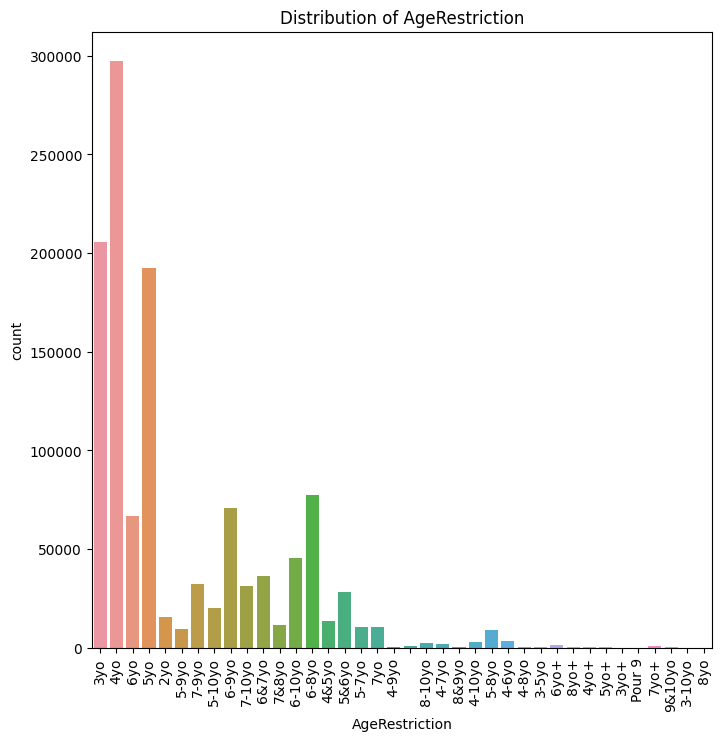

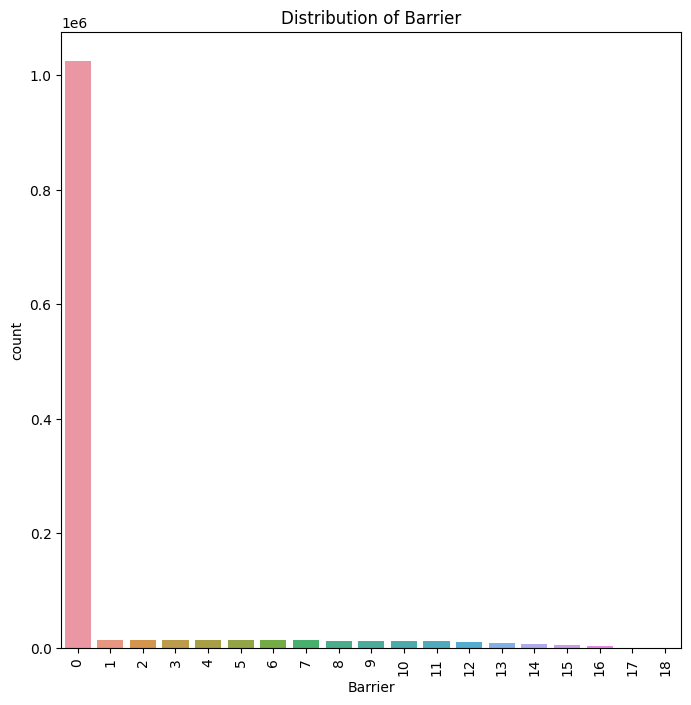

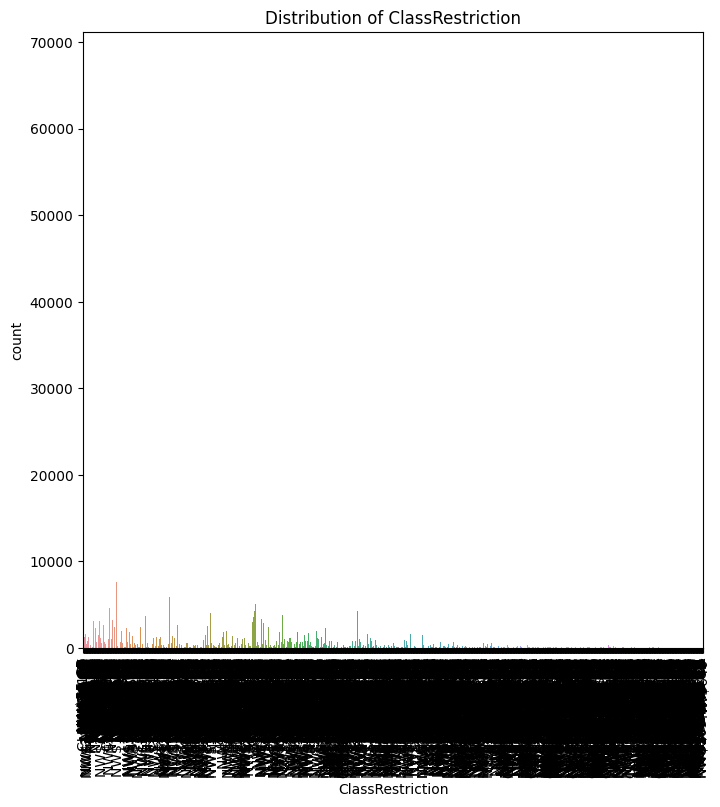

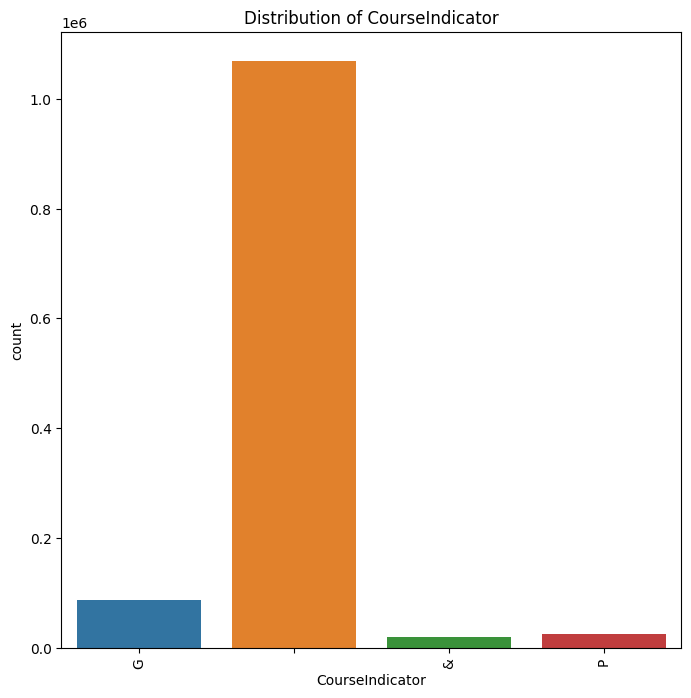

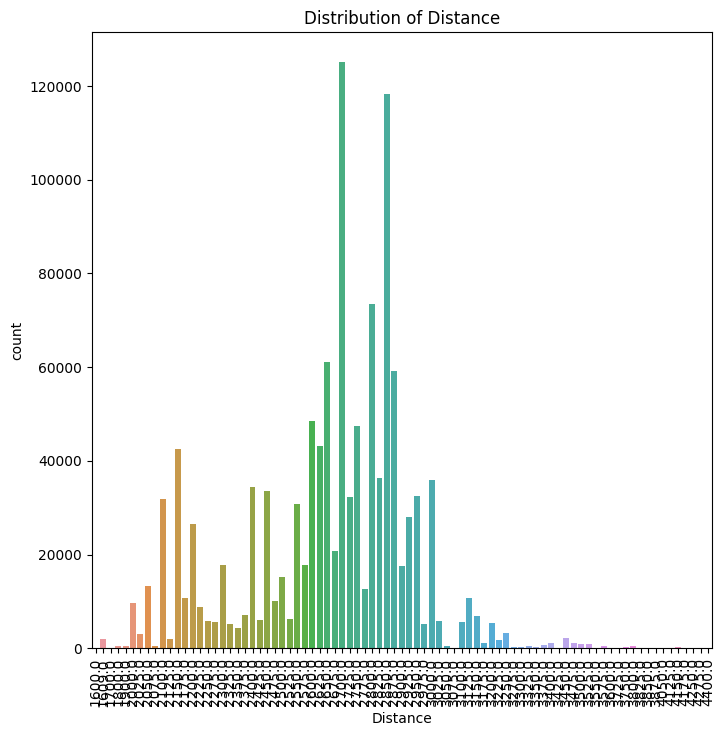

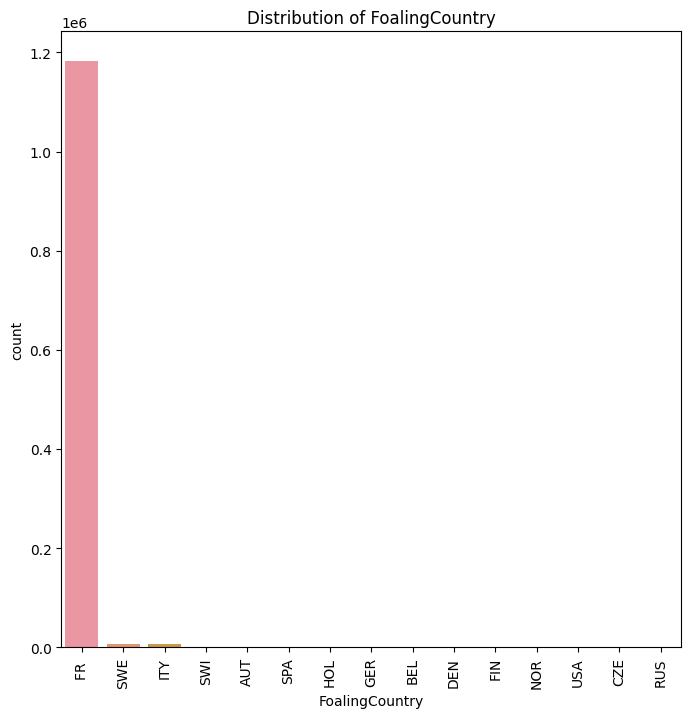

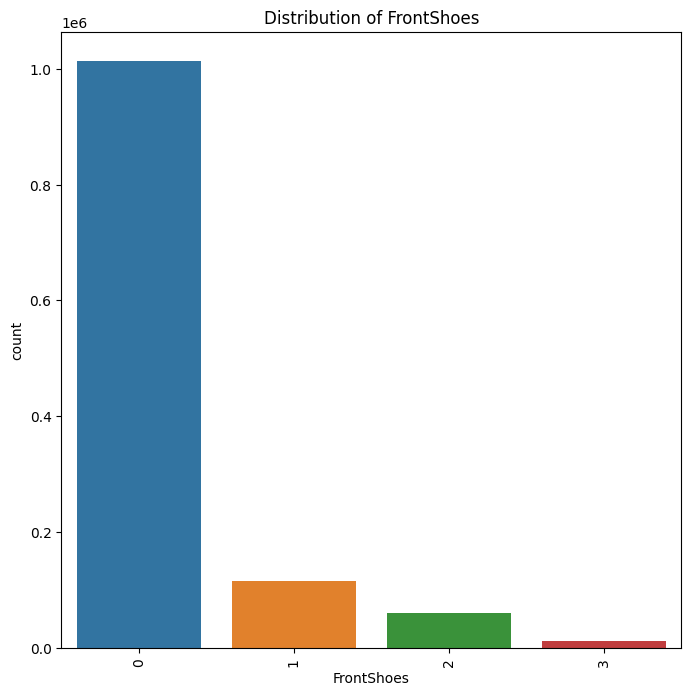

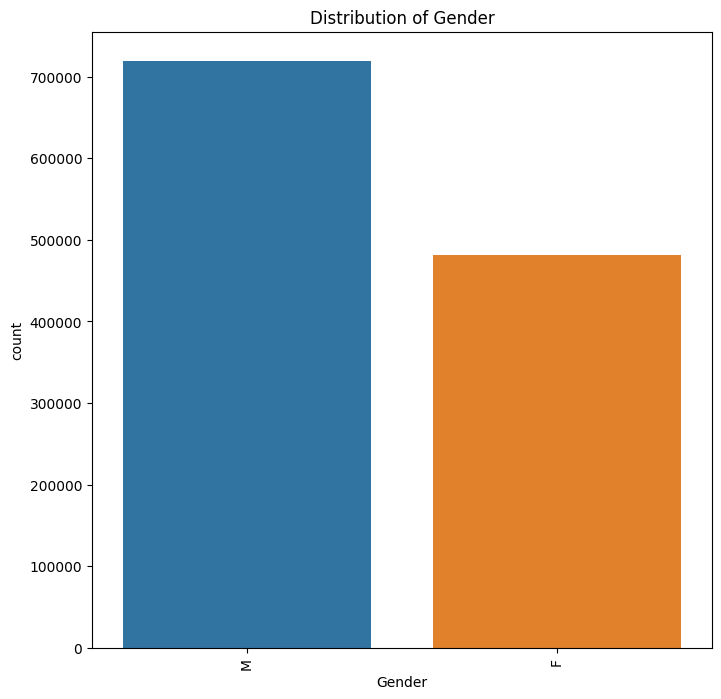

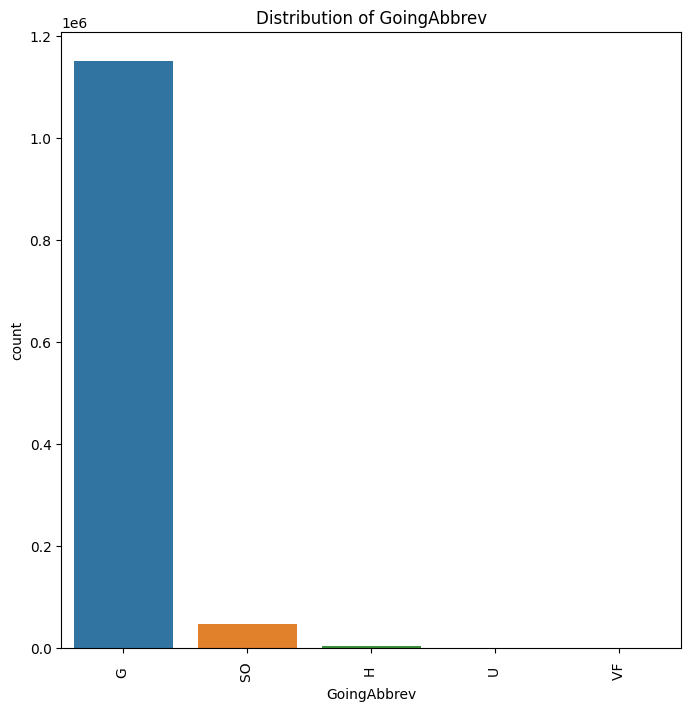

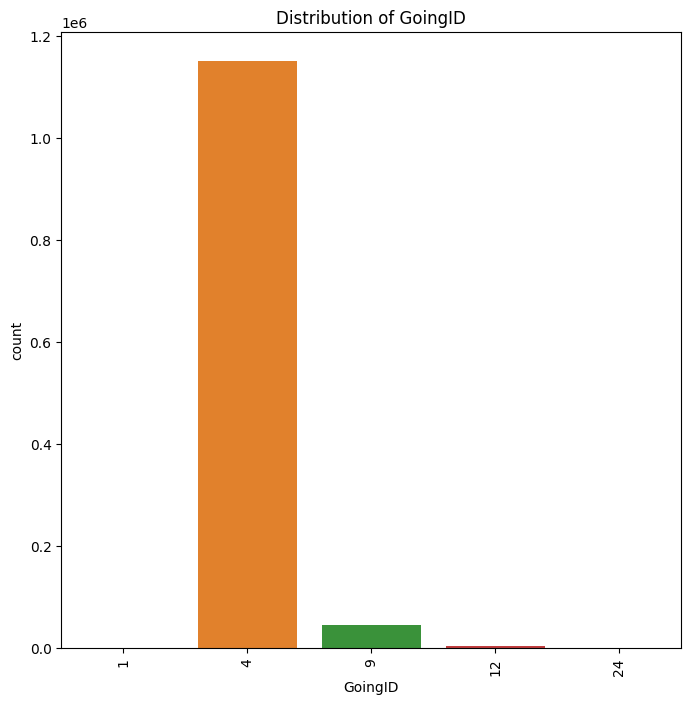

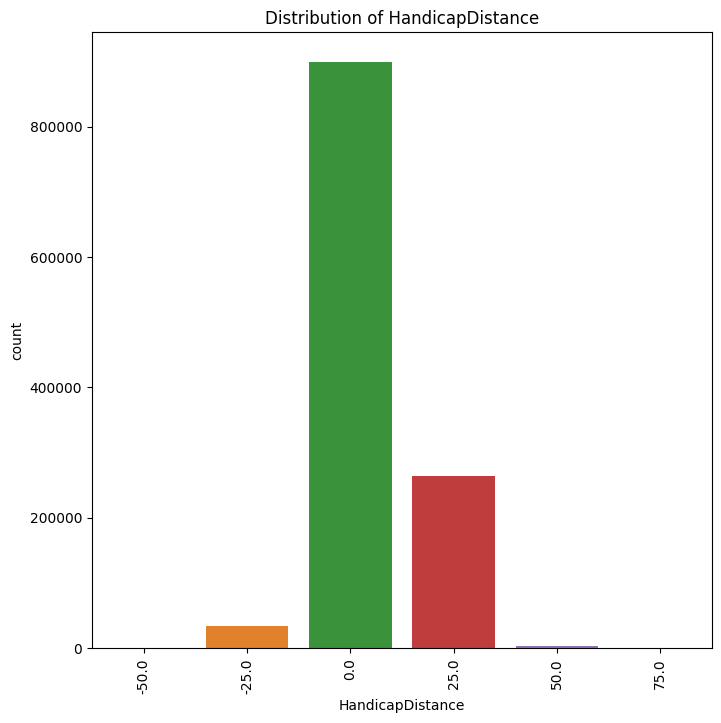

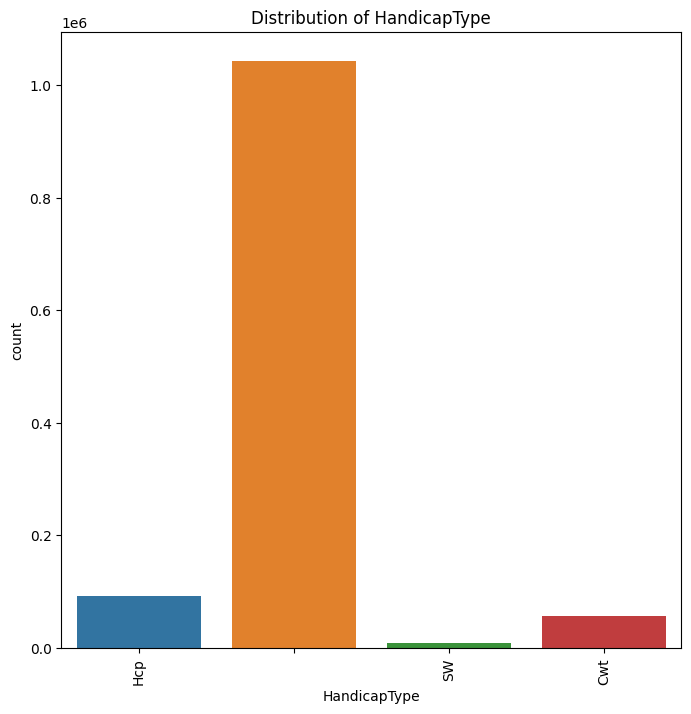

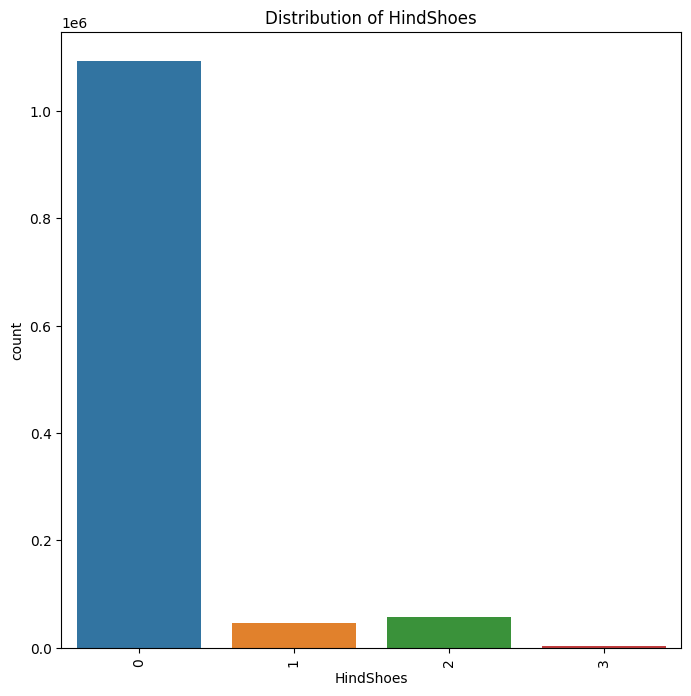

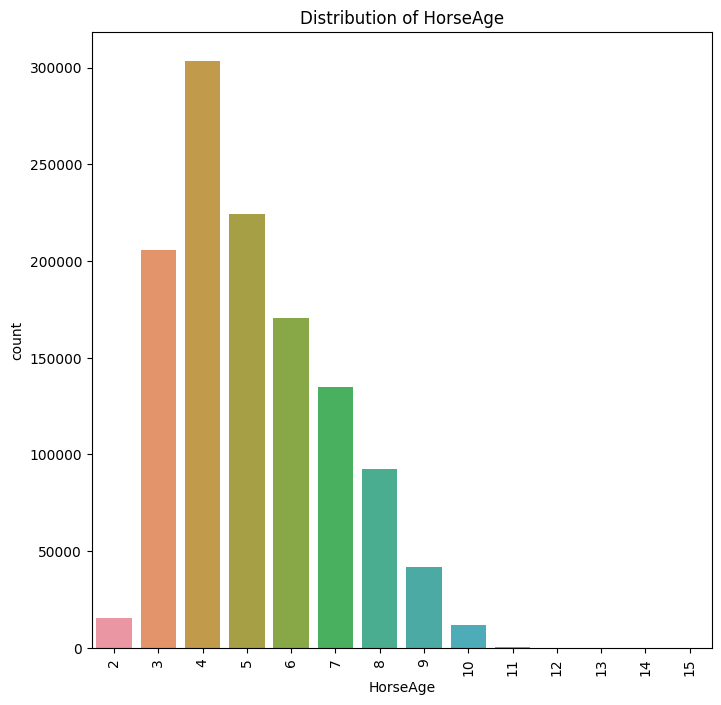

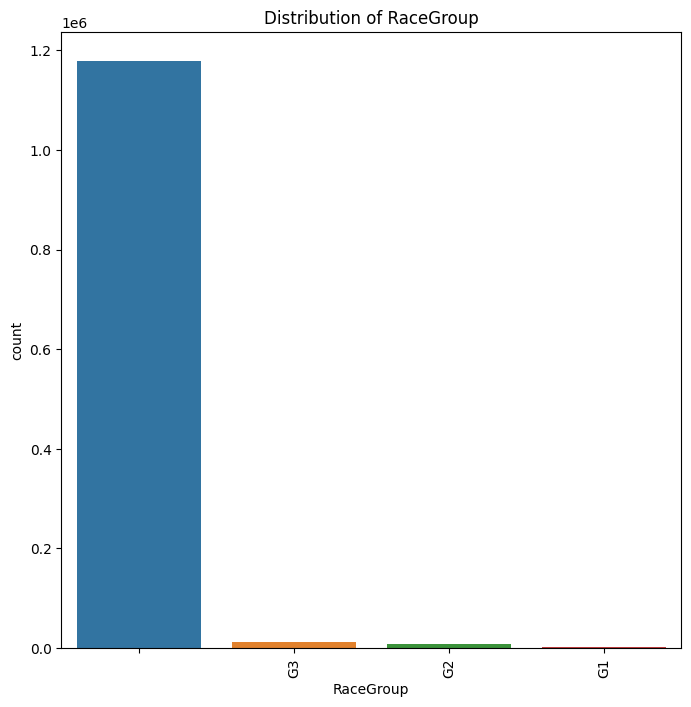

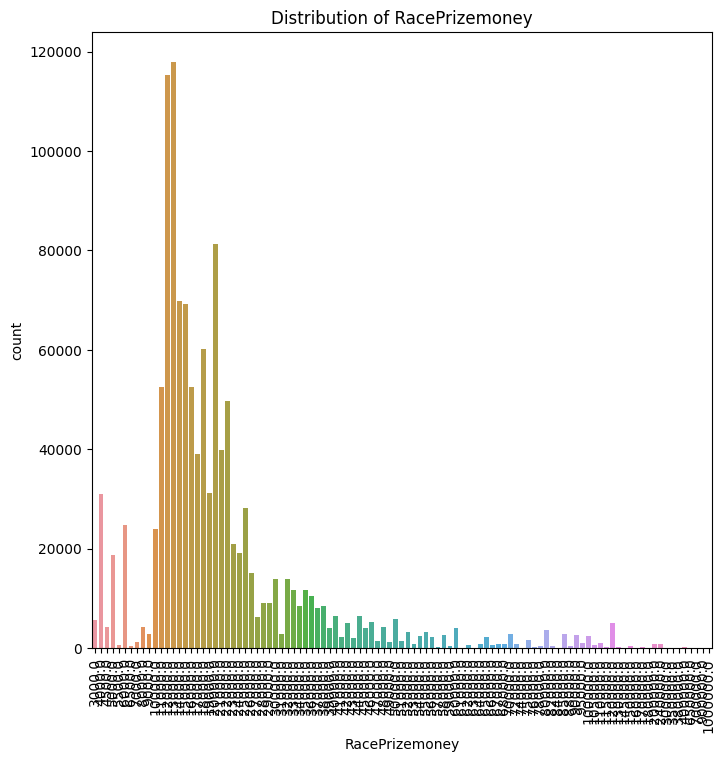

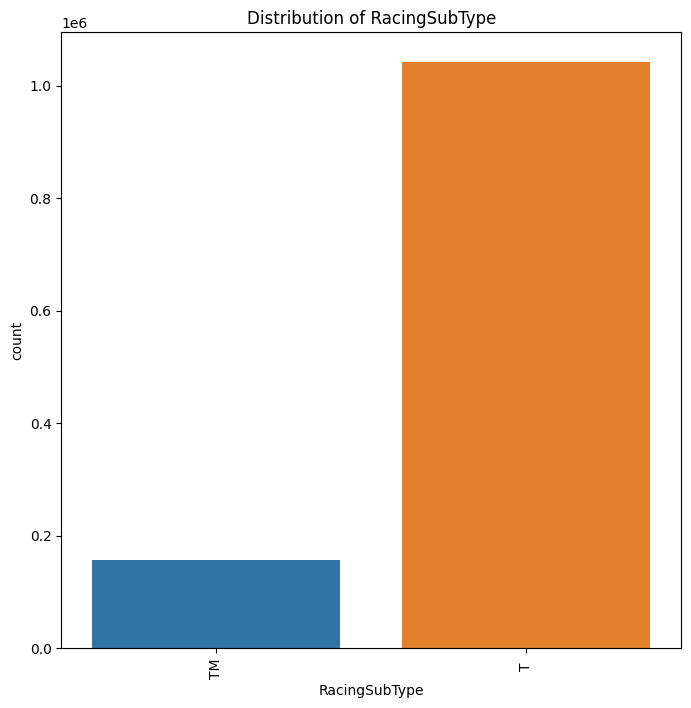

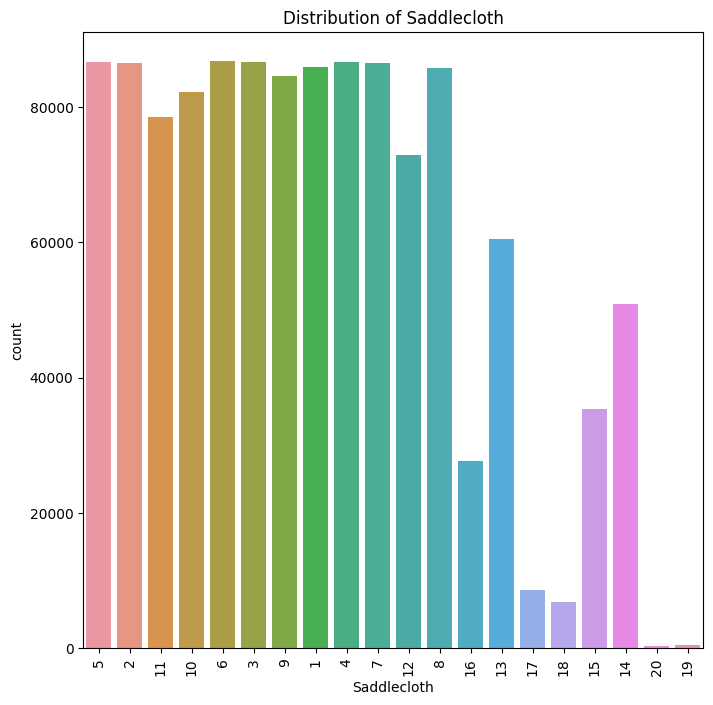

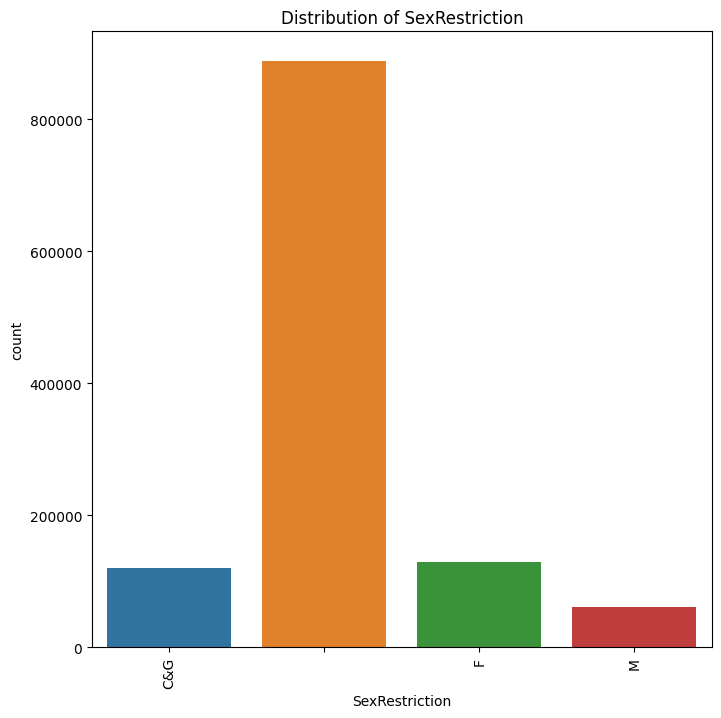

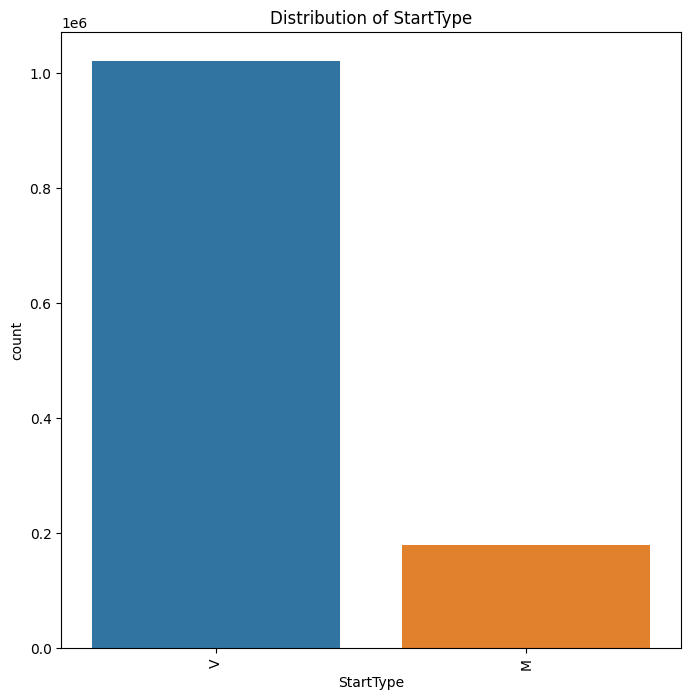

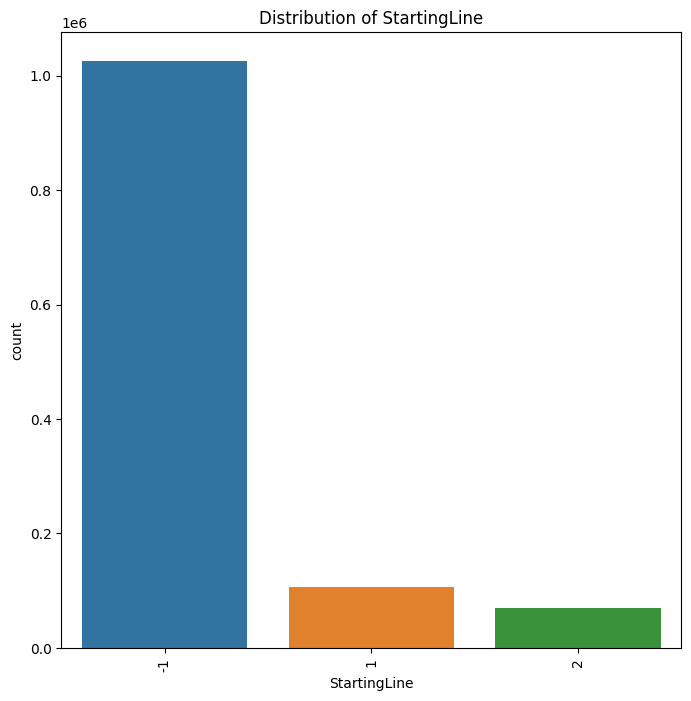

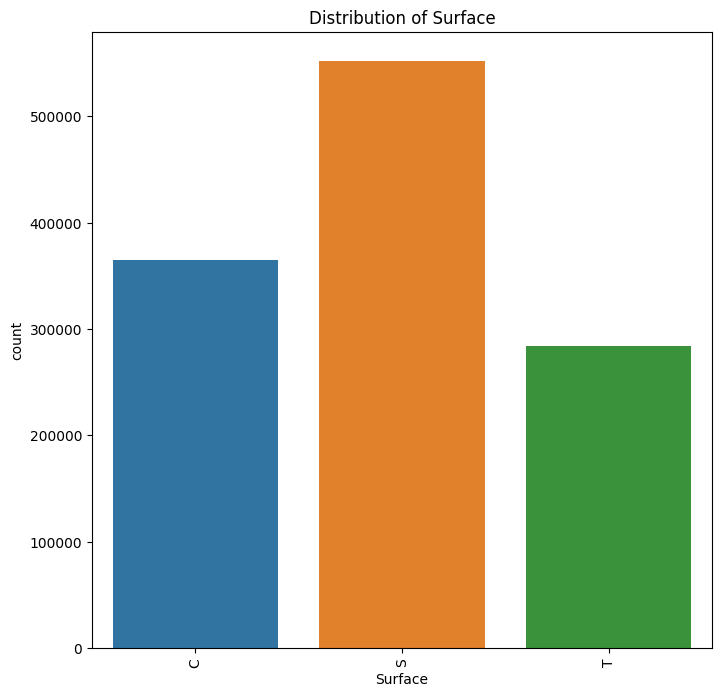

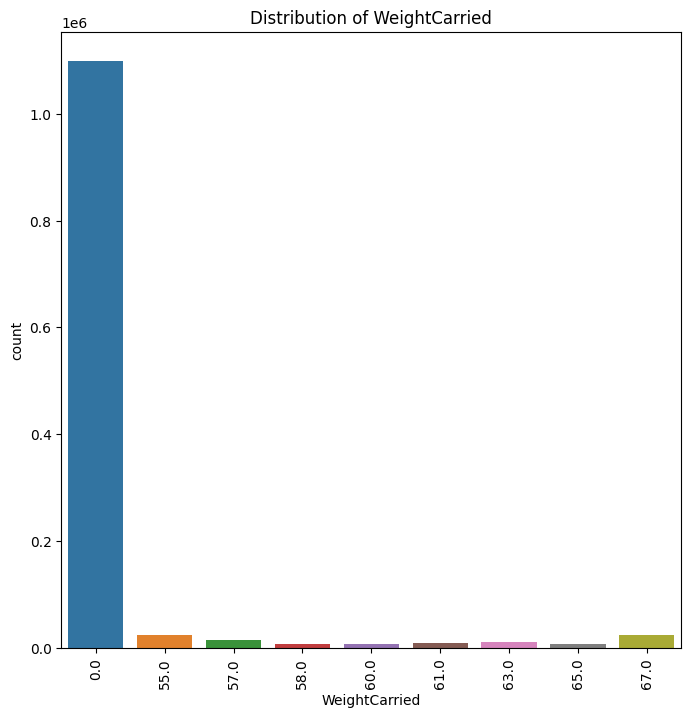

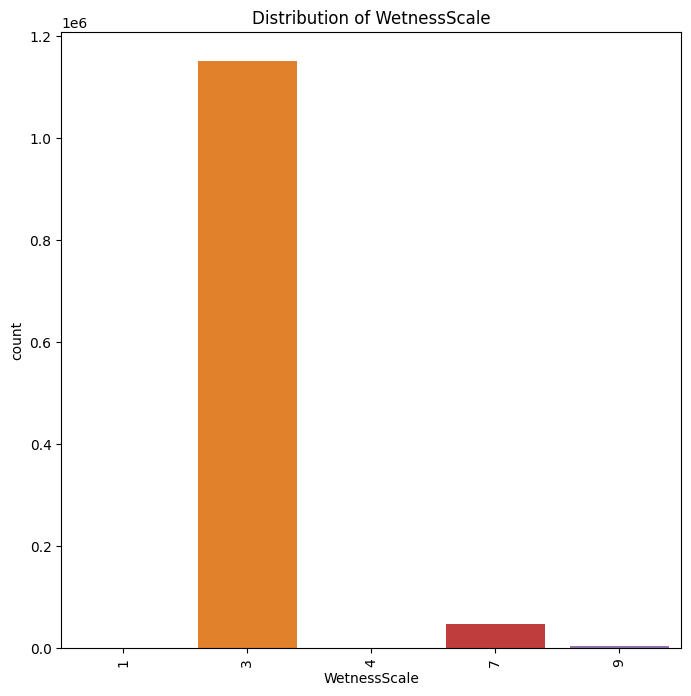

In [ ]:
for col in standard_columns:
  plot_cols(feature = col, df = df)

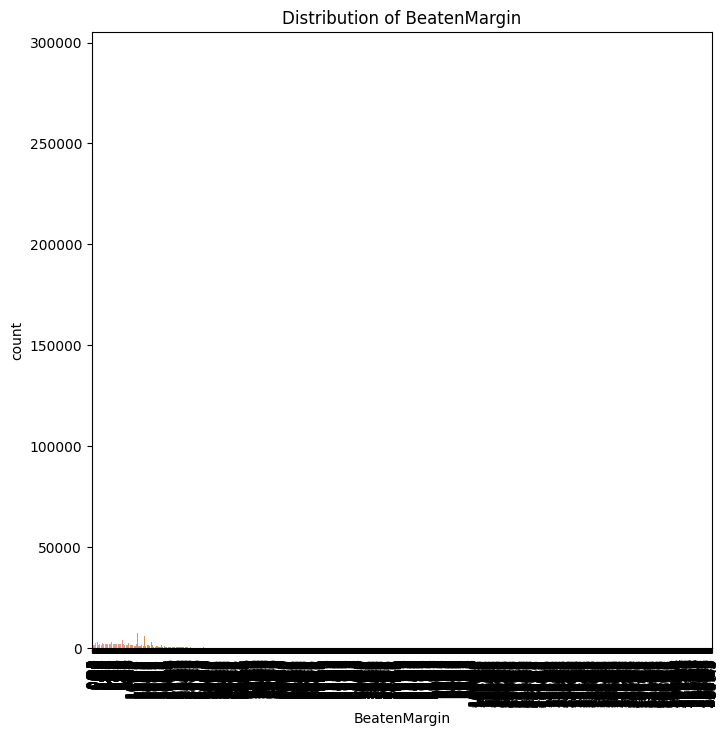

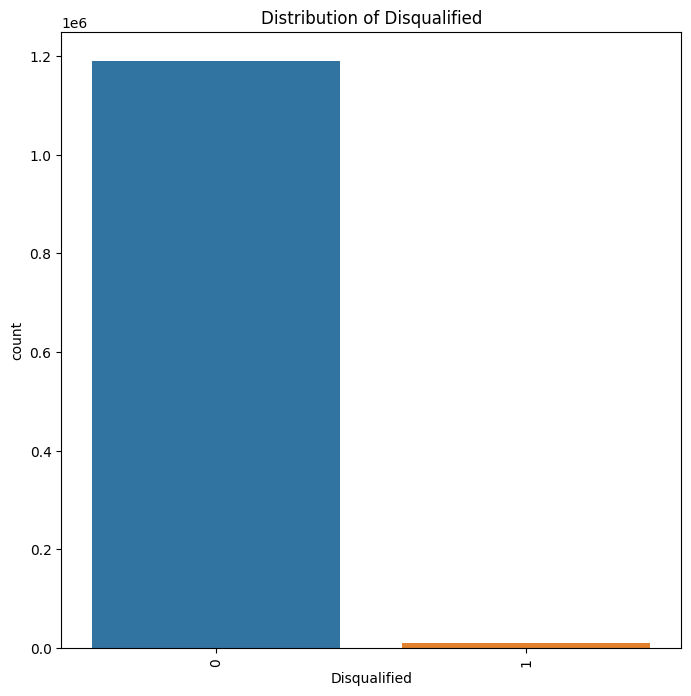

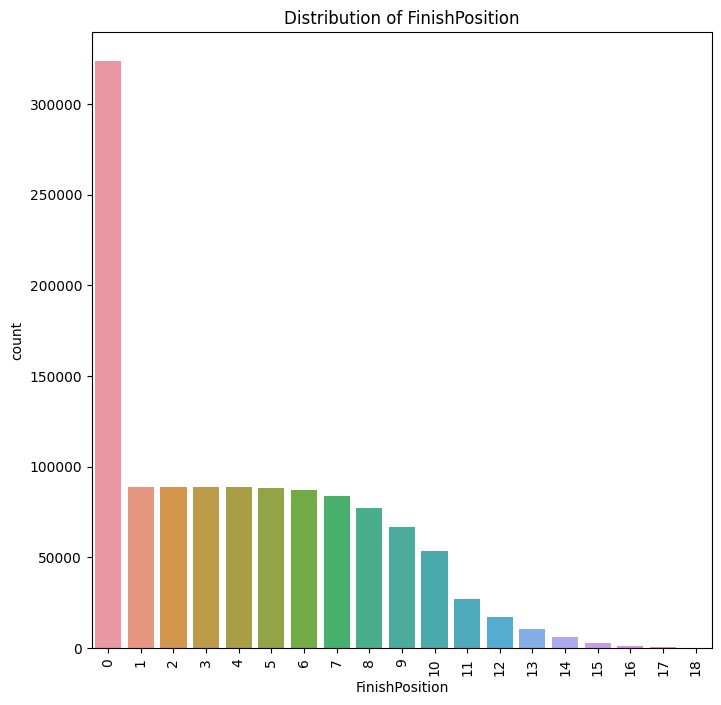

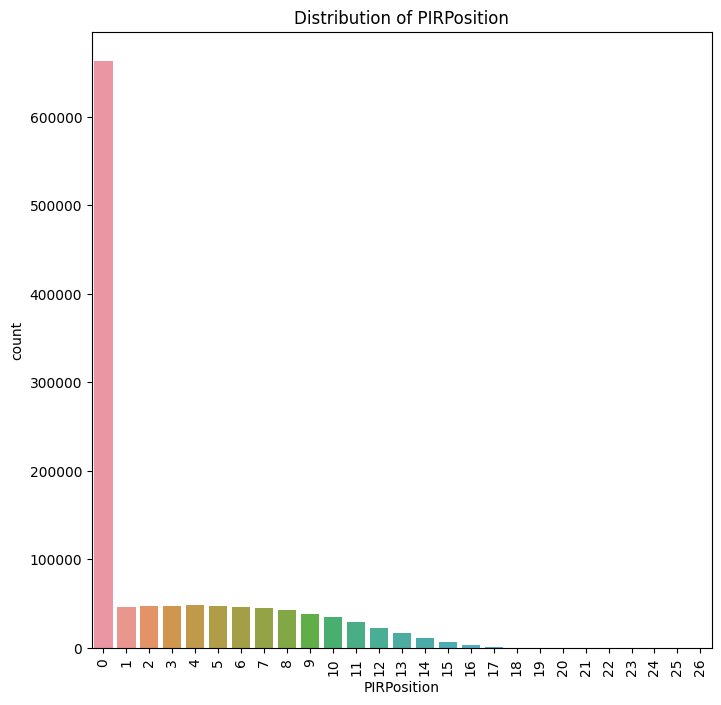

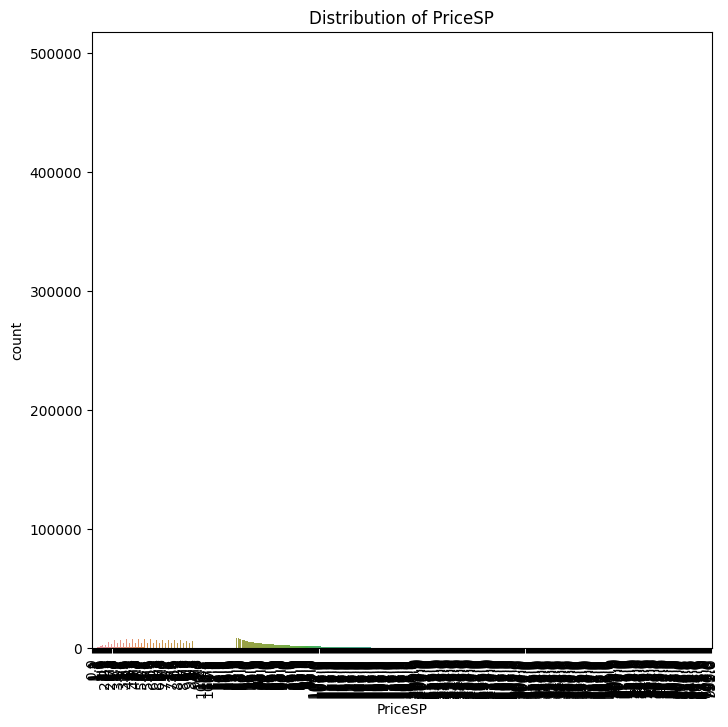

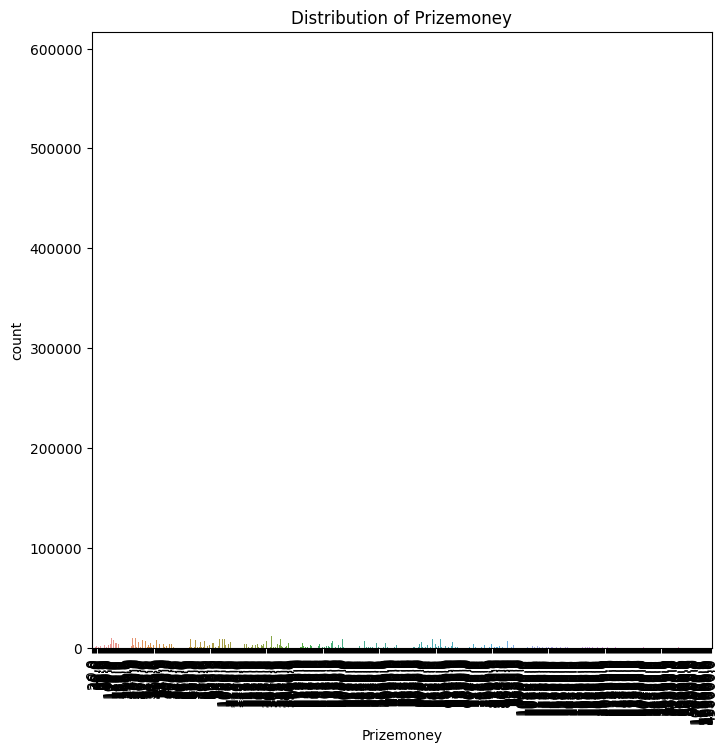

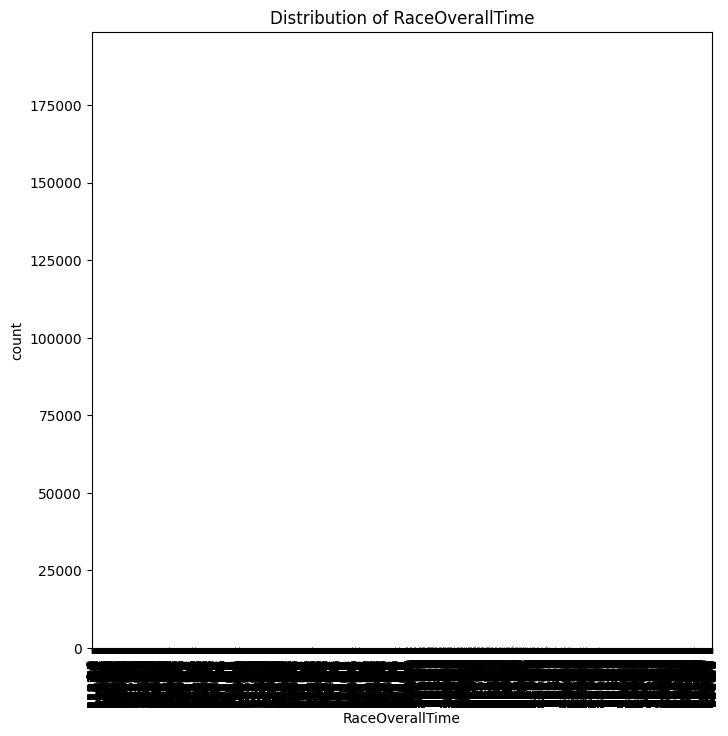

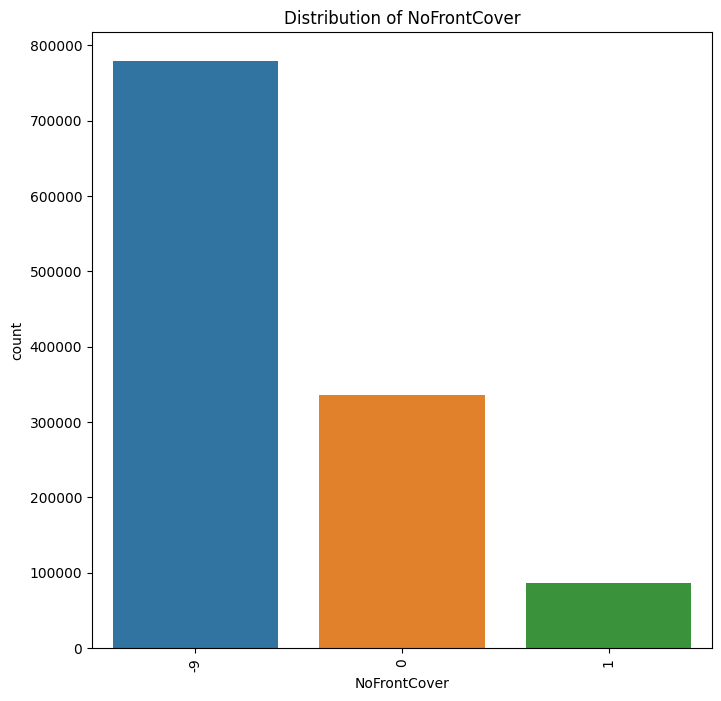

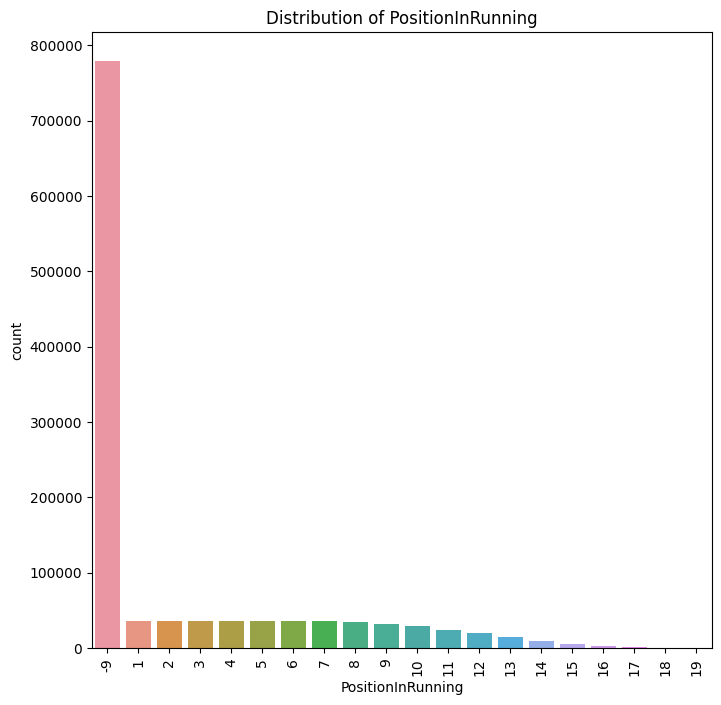

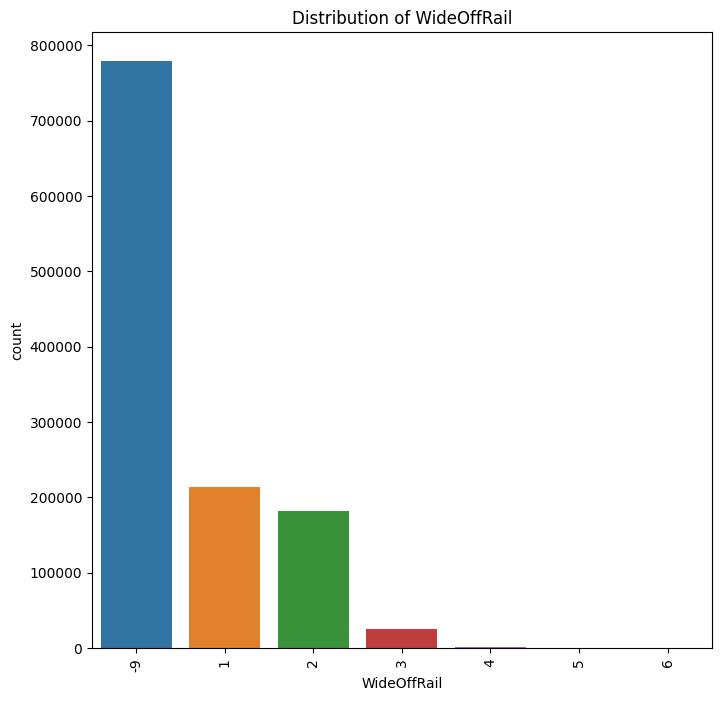

In [ ]:
# plot performance columns
for performance_col in performance_columns:
  plot_cols(feature = performance_col, df = df)

In [ ]:
########.  START HERE

0. Here we'll set a target var ourselves. choose some conditions as below.

In [192]:
df['target_y'] = df.apply(lambda row: 1 if row['Disqualified'] == 0 and row['FinishPosition'] <= 7 else 0, axis=1)


df[['RaceStartTime', 'HorseID', 'Disqualified', 'BeatenMargin', 'FinishPosition', 'Prizemoney', 'PositionInRunning', 'target_y']].head(20)

### check the first row, even if it got first finishPosition, it is disqualified, that means prizemoney=0.

,RaceStartTime,HorseID,Disqualified,BeatenMargin,FinishPosition,Prizemoney,PositionInRunning,target_y
165743,2013-12-09 16:43:00,1480620,0,24.30,10,0.0,20,0
166197,2013-12-09 16:43:00,1502264,0,4.50,3,3080.0,20,1
166196,2013-12-09 16:43:00,1476524,0,6.90,4,1760.0,20,1
165411,2013-12-09 16:43:00,1488801,0,12.15,6,440.0,20,1
165410,2013-12-09 16:43:00,1503986,0,9.45,5,1100.0,20,1
165744,2013-12-09 16:43:00,1484009,0,27.75,11,0.0,20,0
165745,2013-12-09 16:43:00,1499700,0,31.40,12,0.0,20,0
165746,2013-12-09 16:43:00,1501851,0,999.00,20,0.0,20,0
165747,2013-12-09 16:43:00,1477989,0,999.00,20,0.0,20,0
166199,2013-12-09 16:43:00,1478490,0,0.00,1,9900.0,20,1


- plot target and see its distribution

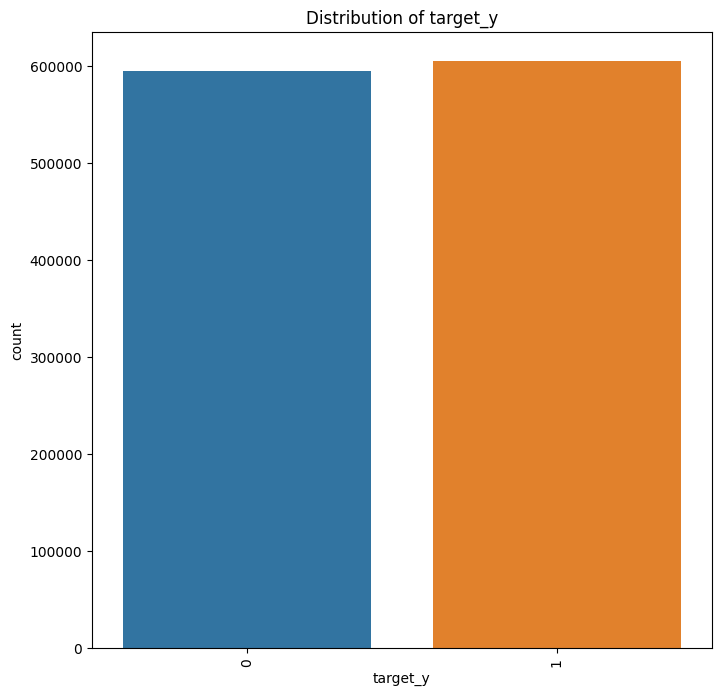

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='target_y')
plt.title(f'Distribution of target_y')
plt.xticks(rotation=90)
plt.show()


In [193]:
print(f'target_y == 0:, {(df.target_y == 0).sum()}')
print(f'target_y == 1:, {(df.target_y == 1).sum()}')


### somehow balanced?

target_y == 0:, 595204
target_y == 1:, 605208


In [194]:
#### here is our X:

features_with_date= df.drop(columns = performance_columns)

features_excluded_cols = ['HorseID', 'DamID', 'JockeyID', 'RaceID', 'SireID', 'TrackID', 'TrainerID', 'FoalingDate', 'ClassRestriction']
features_with_date = features_with_date.drop(columns = features_excluded_cols)

target_y = df['target_y']
features_with_date = features_with_date.drop(columns = ['target_y'])
features_with_date.head(5)

,RaceStartTime,AgeRestriction,Barrier,CourseIndicator,Distance,FoalingCountry,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,RaceGroup,RacePrizemoney,RacingSubType,Saddlecloth,SexRestriction,StartType,StartingLine,Surface,WeightCarried,WetnessScale,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney
165743,2013-12-09 16:43:00,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,9,,22000.0,TM,16,,V,-1,S,57.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
166197,2013-12-09 16:43:00,5-9yo,0,,2650.0,FR,0,M,G,4,0.0,Hcp,0,5,,22000.0,TM,3,,V,-1,S,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
166196,2013-12-09 16:43:00,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,7,,22000.0,TM,11,,V,-1,S,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165411,2013-12-09 16:43:00,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,7,,22000.0,TM,12,,V,-1,S,57.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
165410,2013-12-09 16:43:00,5-9yo,0,,2650.0,FR,0,F,G,4,0.0,Hcp,0,5,,22000.0,TM,5,,V,-1,S,55.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN


In [195]:
print(features_with_date.shape)
print(target_y.shape)

(1200412, 31)
(1200412,)


**1.CLEAN DATA**

- check missing value


In [196]:
# first, explore the dataset - features
features_with_date.isna().sum() ### courseIndicator is na probability
# here means our avg col has nan if there are no previous event before it. We'll fill with 0.

RaceStartTime                0
AgeRestriction               0
Barrier                      0
CourseIndicator              0
Distance                     0
FoalingCountry               0
FrontShoes                   0
Gender                       0
GoingAbbrev                  0
GoingID                      0
HandicapDistance             0
HandicapType                 0
HindShoes                    0
HorseAge                     0
RaceGroup                    0
RacePrizemoney               0
RacingSubType                0
Saddlecloth                  0
SexRestriction               0
StartType                    0
StartingLine                 0
Surface                      0
WeightCarried                0
WetnessScale                 0
avg_BeatenMargin         49548
avg_Disqualified             0
avg_FinishPosition       49548
avg_PIRPosition          49548
avg_PositionInRunning    49548
avg_PriceSP              49548
avg_Prizemoney           49548
dtype: int64

In [197]:
features_with_date = features_with_date.fillna(0)
features_with_date.isna().sum()


# now no missing val, good

RaceStartTime            0
AgeRestriction           0
Barrier                  0
CourseIndicator          0
Distance                 0
FoalingCountry           0
FrontShoes               0
Gender                   0
GoingAbbrev              0
GoingID                  0
HandicapDistance         0
HandicapType             0
HindShoes                0
HorseAge                 0
RaceGroup                0
RacePrizemoney           0
RacingSubType            0
Saddlecloth              0
SexRestriction           0
StartType                0
StartingLine             0
Surface                  0
WeightCarried            0
WetnessScale             0
avg_BeatenMargin         0
avg_Disqualified         0
avg_FinishPosition       0
avg_PIRPosition          0
avg_PositionInRunning    0
avg_PriceSP              0
avg_Prizemoney           0
dtype: int64

In [198]:
# check the features dataset again
date = features_with_date['RaceStartTime']
features = features_with_date.drop(columns=['RaceStartTime'])

features.shape

# feel it's not too meaningful as we have different ids

(1200412, 30)

In [107]:
features.head(5)

,AgeRestriction,Barrier,CourseIndicator,Distance,FoalingCountry,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,RaceGroup,RacePrizemoney,RacingSubType,Saddlecloth,SexRestriction,StartType,StartingLine,Surface,WeightCarried,WetnessScale,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney
165743,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,9,,22000.0,TM,16,,V,-1,S,57.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
166197,5-9yo,0,,2650.0,FR,0,M,G,4,0.0,Hcp,0,5,,22000.0,TM,3,,V,-1,S,55.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
166196,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,7,,22000.0,TM,11,,V,-1,S,55.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
165411,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,7,,22000.0,TM,12,,V,-1,S,57.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
165410,5-9yo,0,,2650.0,FR,0,F,G,4,0.0,Hcp,0,5,,22000.0,TM,5,,V,-1,S,55.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0


**Let's do corr() before one-hot-encoding**

In [ ]:
########## IGNORE FOR NOW #######


In [199]:
print(features.shape)

features.head(5)

(1200412, 30)


,AgeRestriction,Barrier,CourseIndicator,Distance,FoalingCountry,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,RaceGroup,RacePrizemoney,RacingSubType,Saddlecloth,SexRestriction,StartType,StartingLine,Surface,WeightCarried,WetnessScale,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney
165743,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,9,,22000.0,TM,16,,V,-1,S,57.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
166197,5-9yo,0,,2650.0,FR,0,M,G,4,0.0,Hcp,0,5,,22000.0,TM,3,,V,-1,S,55.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
166196,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,7,,22000.0,TM,11,,V,-1,S,55.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
165411,5-9yo,0,,2650.0,FR,0,M,G,4,25.0,Hcp,0,7,,22000.0,TM,12,,V,-1,S,57.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
165410,5-9yo,0,,2650.0,FR,0,F,G,4,0.0,Hcp,0,5,,22000.0,TM,5,,V,-1,S,55.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0


**- One-Hot-Encoding for standard columns**


In [200]:
# cat variables

cat_columns = [# 'ClassRestriction',  # NW$xxx- NON-WINNER for more that $xxx, W - Winner, CLM - claiming, -> 2243 unique num
              ## we'll try other encoding method here
                'CourseIndicator',
                'AgeRestriction',
                'FoalingCountry',
                'FrontShoes',
                'Gender',
                'GoingAbbrev',
                'GoingID',
                'HandicapDistance',
                'HandicapType',
                'HindShoes',
                'RaceGroup',
                'RacingSubType',
                'SexRestriction',
                'StartType', # 2 types - a mobile (auto start) and walk-up (volte) start.
                'StartingLine', # horses with higher winnings start in the first row
                'Surface', # 3 types - Horses can respond differently to different surfaces and can certainly have preferences
                'WetnessScale',
               'Saddlecloth']



cat = ['AgeRestriction', 'ClassRestriction', 'CourseIndicator',  'FoalingCountry', 'Gender', 'GoingAbbrev', 'HandicapType', 'RaceGroup',
       'RacingSubType', 'Saddlecloth',  'SexRestriction', 'StartType', 'Surface']

In [201]:
# do one-hot-encoding for categorical columns

one_hot_encoding_df = pd.get_dummies(features, columns= cat_columns)

one_hot_encoding_df.head(5)

,Barrier,Distance,HorseAge,RacePrizemoney,WeightCarried,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney,CourseIndicator_,CourseIndicator_&,CourseIndicator_G,CourseIndicator_P,AgeRestriction_,AgeRestriction_2yo,AgeRestriction_3-10yo,AgeRestriction_3-5yo,AgeRestriction_3yo,AgeRestriction_3yo+,AgeRestriction_4&5yo,AgeRestriction_4-10yo,AgeRestriction_4-6yo,AgeRestriction_4-7yo,AgeRestriction_4-8yo,AgeRestriction_4-9yo,AgeRestriction_4yo,AgeRestriction_4yo+,AgeRestriction_5&6yo,AgeRestriction_5-10yo,AgeRestriction_5-7yo,AgeRestriction_5-8yo,AgeRestriction_5-9yo,AgeRestriction_5yo,AgeRestriction_5yo+,AgeRestriction_6&7yo,AgeRestriction_6-10yo,AgeRestriction_6-8yo,AgeRestriction_6-9yo,AgeRestriction_6yo,AgeRestriction_6yo+,AgeRestriction_7&8yo,AgeRestriction_7-10yo,AgeRestriction_7-9yo,AgeRestriction_7yo,AgeRestriction_7yo+,AgeRestriction_8&9yo,AgeRestriction_8-10yo,AgeRestriction_8yo,AgeRestriction_8yo+,AgeRestriction_9&10yo,AgeRestriction_Pour 9,FoalingCountry_AUT,FoalingCountry_BEL,FoalingCountry_CZE,FoalingCountry_DEN,FoalingCountry_FIN,FoalingCountry_FR,FoalingCountry_GER,FoalingCountry_HOL,FoalingCountry_ITY,FoalingCountry_NOR,FoalingCountry_RUS,FoalingCountry_SPA,FoalingCountry_SWE,FoalingCountry_SWI,FoalingCountry_USA,FrontShoes_0,FrontShoes_1,FrontShoes_2,FrontShoes_3,Gender_F,Gender_M,GoingAbbrev_G,GoingAbbrev_H,GoingAbbrev_SO,GoingAbbrev_U,GoingAbbrev_VF,GoingID_1,GoingID_4,GoingID_9,GoingID_12,GoingID_24,HandicapDistance_-50.0,HandicapDistance_-25.0,HandicapDistance_0.0,HandicapDistance_25.0,HandicapDistance_50.0,HandicapDistance_75.0,HandicapType_,HandicapType_Cwt,HandicapType_Hcp,HandicapType_SW,HindShoes_0,HindShoes_1,HindShoes_2,HindShoes_3,RaceGroup_,RaceGroup_G1,RaceGroup_G2,RaceGroup_G3,RacingSubType_T,RacingSubType_TM,SexRestriction_,SexRestriction_C&G,SexRestriction_F,SexRestriction_M,StartType_M,StartType_V,StartingLine_-1,StartingLine_1,StartingLine_2,Surface_C,Surface_S,Surface_T,WetnessScale_1,WetnessScale_3,WetnessScale_4,WetnessScale_7,WetnessScale_9,Saddlecloth_1,Saddlecloth_10,Saddlecloth_11,Saddlecloth_12,Saddlecloth_13,Saddlecloth_14,Saddlecloth_15,Saddlecloth_16,Saddlecloth_17,Saddlecloth_18,Saddlecloth_19,Saddlecloth_2,Saddlecloth_20,Saddlecloth_3,Saddlecloth_4,Saddlecloth_5,Saddlecloth_6,Saddlecloth_7,Saddlecloth_8,Saddlecloth_9
165743,0,2650.0,9,22000.0,57.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
166197,0,2650.0,5,22000.0,55.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166196,0,2650.0,7,22000.0,55.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165411,0,2650.0,7,22000.0,57.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165410,0,2650.0,5,22000.0,55.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [202]:
one_hot_encoding_df.shape

(1200412, 142)

In [203]:
one_hot_encoding_df.dtypes

###### Notes: for features, we dont need RaceStartTime and FoalingDate, HorseID, DamID, JockeyID, RaceID, SireID, TrackID, TrainerID


Barrier             int64
Distance          float64
HorseAge            int64
RacePrizemoney    float64
WeightCarried     float64
                   ...   
Saddlecloth_5       uint8
Saddlecloth_6       uint8
Saddlecloth_7       uint8
Saddlecloth_8       uint8
Saddlecloth_9       uint8
Length: 142, dtype: object

- Exploring correlation between columns



In [204]:
import numpy as np

corr_matrix = one_hot_encoding_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# drop one of them
to_drop

['Gender_M',
 'GoingAbbrev_SO ',
 'GoingID_1',
 'GoingID_4',
 'GoingID_9',
 'GoingID_12',
 'GoingID_24',
 'HandicapDistance_25.0',
 'HandicapType_Hcp',
 'RacingSubType_T ',
 'RacingSubType_TM',
 'StartType_V',
 'StartingLine_-1',
 'WetnessScale_1',
 'WetnessScale_3',
 'WetnessScale_4',
 'WetnessScale_7',
 'WetnessScale_9']

In [205]:
one_hot_encoding_df = one_hot_encoding_df.drop(columns = to_drop)
one_hot_encoding_df.shape


(1200412, 124)

In [207]:
corr_matrix

,Barrier,Distance,HorseAge,RacePrizemoney,WeightCarried,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney,CourseIndicator_,CourseIndicator_&,CourseIndicator_G,CourseIndicator_P,AgeRestriction_,AgeRestriction_2yo,AgeRestriction_3-10yo,AgeRestriction_3-5yo,AgeRestriction_3yo,AgeRestriction_3yo+,AgeRestriction_4&5yo,AgeRestriction_4-10yo,AgeRestriction_4-6yo,AgeRestriction_4-7yo,AgeRestriction_4-8yo,AgeRestriction_4-9yo,AgeRestriction_4yo,AgeRestriction_4yo+,AgeRestriction_5&6yo,AgeRestriction_5-10yo,AgeRestriction_5-7yo,AgeRestriction_5-8yo,AgeRestriction_5-9yo,AgeRestriction_5yo,AgeRestriction_5yo+,AgeRestriction_6&7yo,AgeRestriction_6-10yo,AgeRestriction_6-8yo,AgeRestriction_6-9yo,AgeRestriction_6yo,AgeRestriction_6yo+,AgeRestriction_7&8yo,AgeRestriction_7-10yo,AgeRestriction_7-9yo,AgeRestriction_7yo,AgeRestriction_7yo+,AgeRestriction_8&9yo,AgeRestriction_8-10yo,AgeRestriction_8yo,AgeRestriction_8yo+,AgeRestriction_9&10yo,AgeRestriction_Pour 9,FoalingCountry_AUT,FoalingCountry_BEL,FoalingCountry_CZE,FoalingCountry_DEN,FoalingCountry_FIN,FoalingCountry_FR,FoalingCountry_GER,FoalingCountry_HOL,FoalingCountry_ITY,FoalingCountry_NOR,FoalingCountry_RUS,FoalingCountry_SPA,FoalingCountry_SWE,FoalingCountry_SWI,FoalingCountry_USA,FrontShoes_0,FrontShoes_1,FrontShoes_2,FrontShoes_3,Gender_F,Gender_M,GoingAbbrev_G,GoingAbbrev_H,GoingAbbrev_SO,GoingAbbrev_U,GoingAbbrev_VF,GoingID_1,GoingID_4,GoingID_9,GoingID_12,GoingID_24,HandicapDistance_-50.0,HandicapDistance_-25.0,HandicapDistance_0.0,HandicapDistance_25.0,HandicapDistance_50.0,HandicapDistance_75.0,HandicapType_,HandicapType_Cwt,HandicapType_Hcp,HandicapType_SW,HindShoes_0,HindShoes_1,HindShoes_2,HindShoes_3,RaceGroup_,RaceGroup_G1,RaceGroup_G2,RaceGroup_G3,RacingSubType_T,RacingSubType_TM,SexRestriction_,SexRestriction_C&G,SexRestriction_F,SexRestriction_M,StartType_M,StartType_V,StartingLine_-1,StartingLine_1,StartingLine_2,Surface_C,Surface_S,Surface_T,WetnessScale_1,WetnessScale_3,WetnessScale_4,WetnessScale_7,WetnessScale_9,Saddlecloth_1,Saddlecloth_10,Saddlecloth_11,Saddlecloth_12,Saddlecloth_13,Saddlecloth_14,Saddlecloth_15,Saddlecloth_16,Saddlecloth_17,Saddlecloth_18,Saddlecloth_19,Saddlecloth_2,Saddlecloth_20,Saddlecloth_3,Saddlecloth_4,Saddlecloth_5,Saddlecloth_6,Saddlecloth_7,Saddlecloth_8,Saddlecloth_9
Barrier,1.000000,0.363459,0.017582,0.031528,0.106869,0.001157,0.004449,0.001678,0.029952,0.010894,0.040901,0.010497,0.033065,0.092004,0.022427,0.051244,0.003977,0.008110,0.004069,0.004765,0.010196,0.001291,0.003004,0.017824,0.014476,0.014007,0.000174,0.002918,0.008650,0.000663,0.014428,0.020221,0.022664,0.023486,0.011505,0.012129,0.001995,0.001601,0.006244,0.008326,0.014257,0.005390,0.003867,0.045283,0.018109,0.025200,0.018955,0.000120,0.024168,0.020410,0.002209,0.006533,0.012479,0.002813,0.002483,0.005169,0.004144,0.011580,0.013533,0.067612,0.013751,0.008230,0.046116,0.013384,0.004158,0.010046,0.039649,0.006003,0.006224,0.008435,0.000134,0.006058,0.017840,0.001508,0.001508,0.024562,0.016748,0.020566,0.000837,0.000994,0.000837,0.024562,0.020566,0.016748,0.000994,0.004677,0.059805,0.204402,0.187580,0.018916,0.000790,0.137210,0.078199,0.101840,0.030980,0.008732,0.000465,0.009152,0.009336,0.006557,0.009059,0.006347,0.009885,0.137210,0.137210,0.032522,0.011058,0.014636,0.028970,0.842929,0.842929,0.853283,0.354441,0.861496,0.104493,0.071339,0.196771,0.000994,0.024562,0.000837,0.020566,0.016748,0.084613,0.030331,0.040304,0.049063,0.062135,0.066367,0.065794,0.068197,0.012768,0.009989,0.006275,0.071699,0.005372,0.058590,0.045367,0.032096,0.018923,0.006050,0.006041,0.018887
Distance,0.363459,1.000000,0.209773,0.029285,0.002781,0.006344,0.004295,0.053846,0.050119,0.053122,0.030237,0.000042,0.117520,0.221924,0.086299,0.099273,0.004418,0.152844,0.007266,0.015470,0.200018,0.006072,0.018128,0.016873,0.013498,0.022260,0.005841,0.000726,0.012139,0.010407,0.021213,0.053152,0.024561,0.022419,0.028991,0.059041,0.003592,0.040

In [208]:
one_hot_encoding_df.head(2)


,Barrier,Distance,HorseAge,RacePrizemoney,WeightCarried,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney,CourseIndicator_,CourseIndicator_&,CourseIndicator_G,CourseIndicator_P,AgeRestriction_,AgeRestriction_2yo,AgeRestriction_3-10yo,AgeRestriction_3-5yo,AgeRestriction_3yo,AgeRestriction_3yo+,AgeRestriction_4&5yo,AgeRestriction_4-10yo,AgeRestriction_4-6yo,AgeRestriction_4-7yo,AgeRestriction_4-8yo,AgeRestriction_4-9yo,AgeRestriction_4yo,AgeRestriction_4yo+,AgeRestriction_5&6yo,AgeRestriction_5-10yo,AgeRestriction_5-7yo,AgeRestriction_5-8yo,AgeRestriction_5-9yo,AgeRestriction_5yo,AgeRestriction_5yo+,AgeRestriction_6&7yo,AgeRestriction_6-10yo,AgeRestriction_6-8yo,AgeRestriction_6-9yo,AgeRestriction_6yo,AgeRestriction_6yo+,AgeRestriction_7&8yo,AgeRestriction_7-10yo,AgeRestriction_7-9yo,AgeRestriction_7yo,AgeRestriction_7yo+,AgeRestriction_8&9yo,AgeRestriction_8-10yo,AgeRestriction_8yo,AgeRestriction_8yo+,AgeRestriction_9&10yo,AgeRestriction_Pour 9,FoalingCountry_AUT,FoalingCountry_BEL,FoalingCountry_CZE,FoalingCountry_DEN,FoalingCountry_FIN,FoalingCountry_FR,FoalingCountry_GER,FoalingCountry_HOL,FoalingCountry_ITY,FoalingCountry_NOR,FoalingCountry_RUS,FoalingCountry_SPA,FoalingCountry_SWE,FoalingCountry_SWI,FoalingCountry_USA,FrontShoes_0,FrontShoes_1,FrontShoes_2,FrontShoes_3,Gender_F,GoingAbbrev_G,GoingAbbrev_H,GoingAbbrev_U,GoingAbbrev_VF,HandicapDistance_-50.0,HandicapDistance_-25.0,HandicapDistance_0.0,HandicapDistance_50.0,HandicapDistance_75.0,HandicapType_,HandicapType_Cwt,HandicapType_SW,HindShoes_0,HindShoes_1,HindShoes_2,HindShoes_3,RaceGroup_,RaceGroup_G1,RaceGroup_G2,RaceGroup_G3,SexRestriction_,SexRestriction_C&G,SexRestriction_F,SexRestriction_M,StartType_M,StartingLine_1,StartingLine_2,Surface_C,Surface_S,Surface_T,Saddlecloth_1,Saddlecloth_10,Saddlecloth_11,Saddlecloth_12,Saddlecloth_13,Saddlecloth_14,Saddlecloth_15,Saddlecloth_16,Saddlecloth_17,Saddlecloth_18,Saddlecloth_19,Saddlecloth_2,Saddlecloth_20,Saddlecloth_3,Saddlecloth_4,Saddlecloth_5,Saddlecloth_6,Saddlecloth_7,Saddlecloth_8,Saddlecloth_9
165743,0,2650.0,9,22000.0,57.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
166197,0,2650.0,5,22000.0,55.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**- Start Training model**

1.  split train and test set
2.  use cross valudation to choose hyperparameter
3.  use xgboost to train the model and get predicted_target (0/1) with predict_proba()
4. normalize the proba for each row and make sure for each race, sum(prob) = 1



In [209]:
## try to add features with large amount of unique values

features_added_cols = ['DamID', 'JockeyID', 'RaceID', 'SireID', 'TrackID', 'TrainerID', 'HorseID' # here HorseID is not a feature, just in case we need in the final output
                       ]

final_features =  pd.concat([one_hot_encoding_df, df[features_added_cols]], axis=1)
final_features.shape

(1200412, 131)

In [210]:
final_df = pd.concat([date, final_features, target_y], axis=1)
final_df.shape

final_df.columns[final_df.columns.duplicated()]

Index([], dtype='object')

In [211]:

final_df.head(2)

final_df.shape

(1200412, 133)

In [212]:
# change unit8 columns to float64

uint8_columns = final_df.select_dtypes(include=['uint8']).columns

final_df[uint8_columns] = final_df[uint8_columns].astype('float64')

In [213]:
train_df = final_df[final_df['RaceStartTime'] < '2021-11-01']
test_df = final_df[final_df['RaceStartTime'] >= '2021-11-01']
print(train_df.shape)
print(test_df.shape)

(1172292, 133)
(28120, 133)


In [214]:
train_df.head(2)

train_df.dtypes

RaceStartTime     datetime64[ns]
Barrier                    int64
Distance                 float64
HorseAge                   int64
RacePrizemoney           float64
                       ...      
SireID                     int64
TrackID                    int64
TrainerID                  int64
HorseID                    int64
target_y                   int64
Length: 133, dtype: object

In [216]:
X_train = train_df.drop(columns = ['RaceStartTime', 'target_y', 'HorseID'])
X_test = test_df.drop(columns = ['RaceStartTime', 'target_y', 'HorseID'])
y_train = train_df['target_y']
y_test= test_df['target_y']
train_date = train_df['RaceStartTime']
test_date = test_df['RaceStartTime']

train_horse_id = train_df['HorseID']
test_horse_id = test_df['HorseID']

In [217]:
train_df.shape
len(train_df.dtypes)

duplicate_columns = X_train.columns[X_train.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [155]:
X_train.columns

Index(['Barrier', 'Distance', 'HorseAge', 'RacePrizemoney', 'WeightCarried',
       'avg_BeatenMargin', 'avg_Disqualified', 'avg_FinishPosition',
       'avg_PIRPosition', 'avg_PositionInRunning',
       ...
       'Saddlecloth_6', 'Saddlecloth_7', 'Saddlecloth_8', 'Saddlecloth_9',
       'DamID', 'JockeyID', 'RaceID', 'SireID', 'TrackID', 'TrainerID'],
      dtype='object', length=130)

In [156]:
X_train.dtypes


Barrier             int64
Distance          float64
HorseAge            int64
RacePrizemoney    float64
WeightCarried     float64
                   ...   
JockeyID            int64
RaceID              int64
SireID              int64
TrackID             int64
TrainerID           int64
Length: 130, dtype: object

In [218]:
# now we can do cross validation to select hypermaters

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


######## THIS IS V1 - just test if we do nothing, how is the accuracy
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# predictions & pred_probability
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

win_probabilities = y_pred_proba[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6092816500711238


In [219]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred)

# Print or use the AUC-ROC score
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.6078913665407477


In [ ]:
### 0.6 accuracy - bad

- Now, we'll add cross validation to choose the best parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint

# Define distributions for hyperparameters
params = {
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 10),
    'colsample_bytree': uniform(0.1, 0.9),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=20, cv=kf, scoring='accuracy')

random_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    early_stopping_rounds=10,
    verbose=False
)
# Get the best hyperparameters
best_params = random_search.best_params_


In [220]:
##### final model used


model2 = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=1000,
    colsample_bytree = 0.5
)

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred2 = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
y_pred_proba = model2.predict_proba(X_test)

win_probabilities = y_pred_proba[:, 1]

print("Accuracy:", accuracy)

Accuracy: 0.6157894736842106


In [166]:
test_df['winprobability'] = win_probabilities
test_df['winprobability'] = test_df.groupby('RaceStartTime')['winprobability'].transform(lambda x: x / x.sum())

test_df.head(2)

<ipython-input-166-52c65d25c0ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['winprobability'] = win_probabilities
<ipython-input-166-52c65d25c0ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['winprobability'] = test_df.groupby('RaceStartTime')['winprobability'].transform(lambda x: x / x.sum())


,RaceStartTime,Barrier,Distance,HorseAge,RacePrizemoney,WeightCarried,avg_BeatenMargin,avg_Disqualified,avg_FinishPosition,avg_PIRPosition,avg_PositionInRunning,avg_PriceSP,avg_Prizemoney,CourseIndicator_,CourseIndicator_&,CourseIndicator_G,CourseIndicator_P,AgeRestriction_,AgeRestriction_2yo,AgeRestriction_3-10yo,AgeRestriction_3-5yo,AgeRestriction_3yo,AgeRestriction_3yo+,AgeRestriction_4&5yo,AgeRestriction_4-10yo,AgeRestriction_4-6yo,AgeRestriction_4-7yo,AgeRestriction_4-8yo,AgeRestriction_4-9yo,AgeRestriction_4yo,AgeRestriction_4yo+,AgeRestriction_5&6yo,AgeRestriction_5-10yo,AgeRestriction_5-7yo,AgeRestriction_5-8yo,AgeRestriction_5-9yo,AgeRestriction_5yo,AgeRestriction_5yo+,AgeRestriction_6&7yo,AgeRestriction_6-10yo,AgeRestriction_6-8yo,AgeRestriction_6-9yo,AgeRestriction_6yo,AgeRestriction_6yo+,AgeRestriction_7&8yo,AgeRestriction_7-10yo,AgeRestriction_7-9yo,AgeRestriction_7yo,AgeRestriction_7yo+,AgeRestriction_8&9yo,AgeRestriction_8-10yo,AgeRestriction_8yo,AgeRestriction_8yo+,AgeRestriction_9&10yo,AgeRestriction_Pour 9,FoalingCountry_AUT,FoalingCountry_BEL,FoalingCountry_CZE,FoalingCountry_DEN,FoalingCountry_FIN,FoalingCountry_FR,FoalingCountry_GER,FoalingCountry_HOL,FoalingCountry_ITY,FoalingCountry_NOR,FoalingCountry_RUS,FoalingCountry_SPA,FoalingCountry_SWE,FoalingCountry_SWI,FoalingCountry_USA,FrontShoes_0,FrontShoes_1,FrontShoes_2,FrontShoes_3,Gender_F,GoingAbbrev_G,GoingAbbrev_H,GoingAbbrev_U,GoingAbbrev_VF,HandicapDistance_-50.0,HandicapDistance_-25.0,HandicapDistance_0.0,HandicapDistance_50.0,HandicapDistance_75.0,HandicapType_,HandicapType_Cwt,HandicapType_SW,HindShoes_0,HindShoes_1,HindShoes_2,HindShoes_3,RaceGroup_,RaceGroup_G1,RaceGroup_G2,RaceGroup_G3,SexRestriction_,SexRestriction_C&G,SexRestriction_F,SexRestriction_M,StartType_M,StartingLine_1,StartingLine_2,Surface_C,Surface_S,Surface_T,Saddlecloth_1,Saddlecloth_10,Saddlecloth_11,Saddlecloth_12,Saddlecloth_13,Saddlecloth_14,Saddlecloth_15,Saddlecloth_16,Saddlecloth_17,Saddlecloth_18,Saddlecloth_19,Saddlecloth_2,Saddlecloth_20,Saddlecloth_3,Saddlecloth_4,Saddlecloth_5,Saddlecloth_6,Saddlecloth_7,Saddlecloth_8,Saddlecloth_9,DamID,JockeyID,RaceID,SireID,TrackID,TrainerID,HorseID,target_y,winprobability
1052636,2021-11-01 14:00:00,0,2750.0,4,14000.0,0.0,5.60,0,8.0,5.0,9.0,62.0,1522.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1556099,22573,1680310,1474897,911,38003,1557758,1,0.09180
1052635,2021-11-01 14:00:00,0,2750.0,4,14000.0,0.0,203.65,0,8.0,4.0,8.0,19.0,4590.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1499838,22371,1680310,1505047,911,37812,1558380,1,0.10397


In [167]:
### check whether the prob sum = 1 for each raceID/starttime

check_prob = test_df.groupby('RaceStartTime')['winprobability'].sum()
check_prob

RaceStartTime
2021-11-01 12:31:00    1.0
2021-11-01 13:01:00    1.0
2021-11-01 13:13:00    1.0
2021-11-01 13:30:00    1.0
2021-11-01 13:31:00    1.0
                      ... 
2022-02-10 15:37:00    1.0
2022-02-10 16:18:00    1.0
2022-02-10 16:51:00    1.0
2022-02-10 17:27:00    1.0
2022-02-10 17:59:00    1.0
Name: winprobability, Length: 2066, dtype: float32

In [168]:
result_df = test_df[['RaceStartTime', 'HorseID', 'winprobability']]
result_df

,RaceStartTime,HorseID,winprobability
1052636,2021-11-01 14:00:00,1557758,0.091800
1052635,2021-11-01 14:00:00,1558380,0.103970
1053262,2021-11-01 14:00:00,1557225,0.075817
1053263,2021-11-01 14:00:00,1559009,0.091259
1053268,2021-11-01 14:00:00,1555570,0.045172
...,...,...,...
136168,2022-02-10 17:59:00,1558455,0.070277
136167,2022-02-10 17:59:00,1555238,0.088045
136046,2022-02-10 17:59:00,1558875,0.103469
136042,2022-02-10 17:59:00,1556789,0.136984


In [163]:
# result_df.to_csv('final_result_for_test.csv', index=False)


In [221]:
# combine all of them for getting winprob for all obs in df
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

model2 = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=1000,
    colsample_bytree = 0.5
)


model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_full)
y_pred_proba = model2.predict_proba(X_full)


accuracy = accuracy_score(y_full, y_pred2)


win_probabilities = y_pred_proba[:, 1]

# add win prob to a whole df
df['winprobability'] = win_probabilities

# Save the dataset with win probabilities to a new file
# df.to_csv('CANSSI_with_win_probabilities.csv', index=False)

In [171]:
print("Accuracy:", accuracy)

Accuracy: 0.641770492131035


In [224]:
# add winprob to the original_df

original_df['winprobability'] = win_probabilities
original_df['winprobability'] = df.groupby('RaceStartTime')['winprobability'].transform(lambda x: x / x.sum())

original_df.head(2)

,AgeRestriction,Barrier,BeatenMargin,ClassRestriction,CourseIndicator,DamID,Disqualified,Distance,FinishPosition,FoalingCountry,FoalingDate,FrontShoes,Gender,GoingAbbrev,GoingID,HandicapDistance,HandicapType,HindShoes,HorseAge,HorseID,JockeyID,PIRPosition,PriceSP,Prizemoney,RaceGroup,RaceID,RaceOverallTime,RacePrizemoney,RaceStartTime,RacingSubType,Saddlecloth,SexRestriction,SireID,StartType,StartingLine,Surface,TrackID,TrainerID,NoFrontCover,PositionInRunning,WideOffRail,WeightCarried,WetnessScale,winprobability
0,6yo,5,1.55,NW$101 CD,,1491946,False,2150.0,2,FR,2009-04-13,0,F,G,4,0.0,,0,6,1514407,23568,0,3.50,11500.0,,1596364,168.89,46000.0,2015-04-18 14:01:00,T,5,M,1474781,M,1,S,951,38190,-9,-9,-9,0.0,3,0.119524
1,6yo,6,3.55,NW$101 CD,,1509392,False,2150.0,4,FR,2009-05-24,0,F,G,4,0.0,,0,6,1509393,25025,0,4.75,3680.0,,1596364,168.89,46000.0,2015-04-18 14:01:00,T,6,M,1474692,M,1,S,951,38432,-9,-9,-9,0.0,3,0.116921


In [226]:
# check whether original_df prob for each race,  sum=1
check_prob = original_df.groupby('RaceStartTime')['winprobability'].sum()
check_prob

RaceStartTime
2013-12-09 12:30:00    1.0
2013-12-09 13:00:00    1.0
2013-12-09 13:31:00    1.0
2013-12-09 14:09:00    1.0
2013-12-09 14:37:00    1.0
                      ... 
2022-02-10 15:37:00    1.0
2022-02-10 16:18:00    1.0
2022-02-10 16:51:00    1.0
2022-02-10 17:27:00    1.0
2022-02-10 17:59:00    1.0
Name: winprobability, Length: 70352, dtype: float32

In [228]:
import pandas as pd
import pyarrow as pa

parquet_file_path = 'CANSSI_output_with_prob.parquet'

# Convert the pandas DataFrame to a pyarrow Table
table = pa.Table.from_pandas(original_df)

# Write the Table to a Parquet file
with pa.OSFile(parquet_file_path, 'wb') as sink:
    with pa.RecordBatchFileWriter(sink, table.schema) as writer:
        writer.write_table(table)